In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
import requests
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', None)

In [2]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "firebrick", "red", "lightcoral", "salmon"]
cmap = LinearSegmentedColormap.from_list("custom_fire", colors, N=5)

In [3]:
m = pd.read_csv('./ph_fires_matched_2.1.csv')

In [4]:
# es = m[m.building_type_code_es == 1]

df = m[m.building_type_code_es == 1].copy()
for year in range(2012, 2022):
    df[f'unconfined_loss_fires_{year}'] = df[
        (df[f'inc_type_111_{year}'] > 0) |
        (df[f'prop_loss_{year}'] > 0) |
        (df[f'cont_loss_{year}'] > 0) |
        (df[f'oth_death_{year}'] > 0) |
        (df[f'oth_inj_{year}'] > 0)
    ].sum(axis=1)

yes = df[df[[f'unconfined_loss_fires_{year}' for year in range(2012, 2022)]].sum(axis=1) > 0]
no = df[df[[f'unconfined_loss_fires_{year}' for year in range(2012, 2022)]].sum(axis=1) == 0]

C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\1930112125.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[f'unconfined_loss_fires_{year}'] = df[
C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\1930112125.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[f'unconfined_loss_fires_{year}'] = df[
C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\1930112125.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[f'unconfined_loss_fires_{year}'] = df[
C:\Users\jackv\AppData\Lo

C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\79010106.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}%'.format(val) for val in ax.get_xticks()])


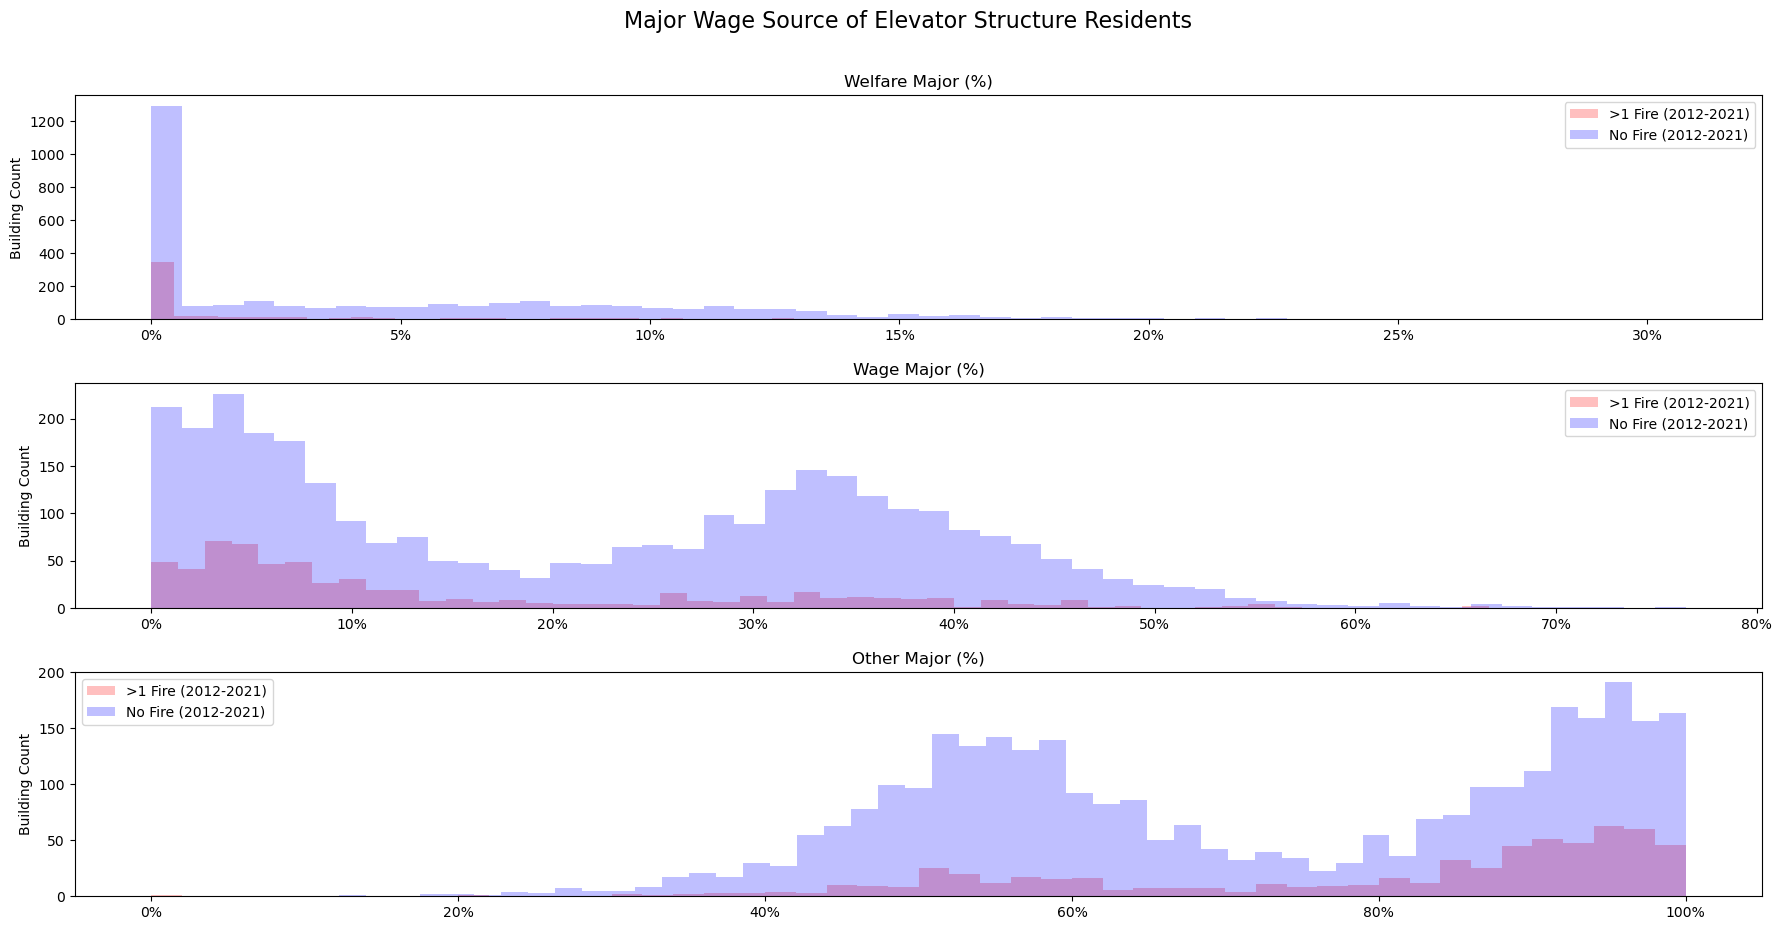

In [5]:
cols_to_plot = [
    'pct_welfare_major',
    'pct_wage_major',
    'pct_other_major'
]

# Step 1: Define custom titles
custom_titles = {
    'pct_welfare_major': 'Welfare Major (%)',
    'pct_wage_major': 'Wage Major (%)',
    'pct_other_major': 'Other Major (%)'
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 9))
fig.tight_layout(pad=2.5)

for idx, column in enumerate(cols_to_plot):
    ax = axes[idx]
    ax.hist(yes[column], bins=50, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
    ax.hist(no[column], bins=50, alpha=0.25, label='No Fire (2012-2021)', color='blue')
    ax.set_title(custom_titles[column])
    ax.legend()
    ax.set_ylabel('Building Count')
    ax.set_xticklabels(['{:.0f}%'.format(val) for val in ax.get_xticks()])
fig.suptitle('Major Wage Source of Elevator Structure Residents', fontsize=16, y=1.05)
plt.show()

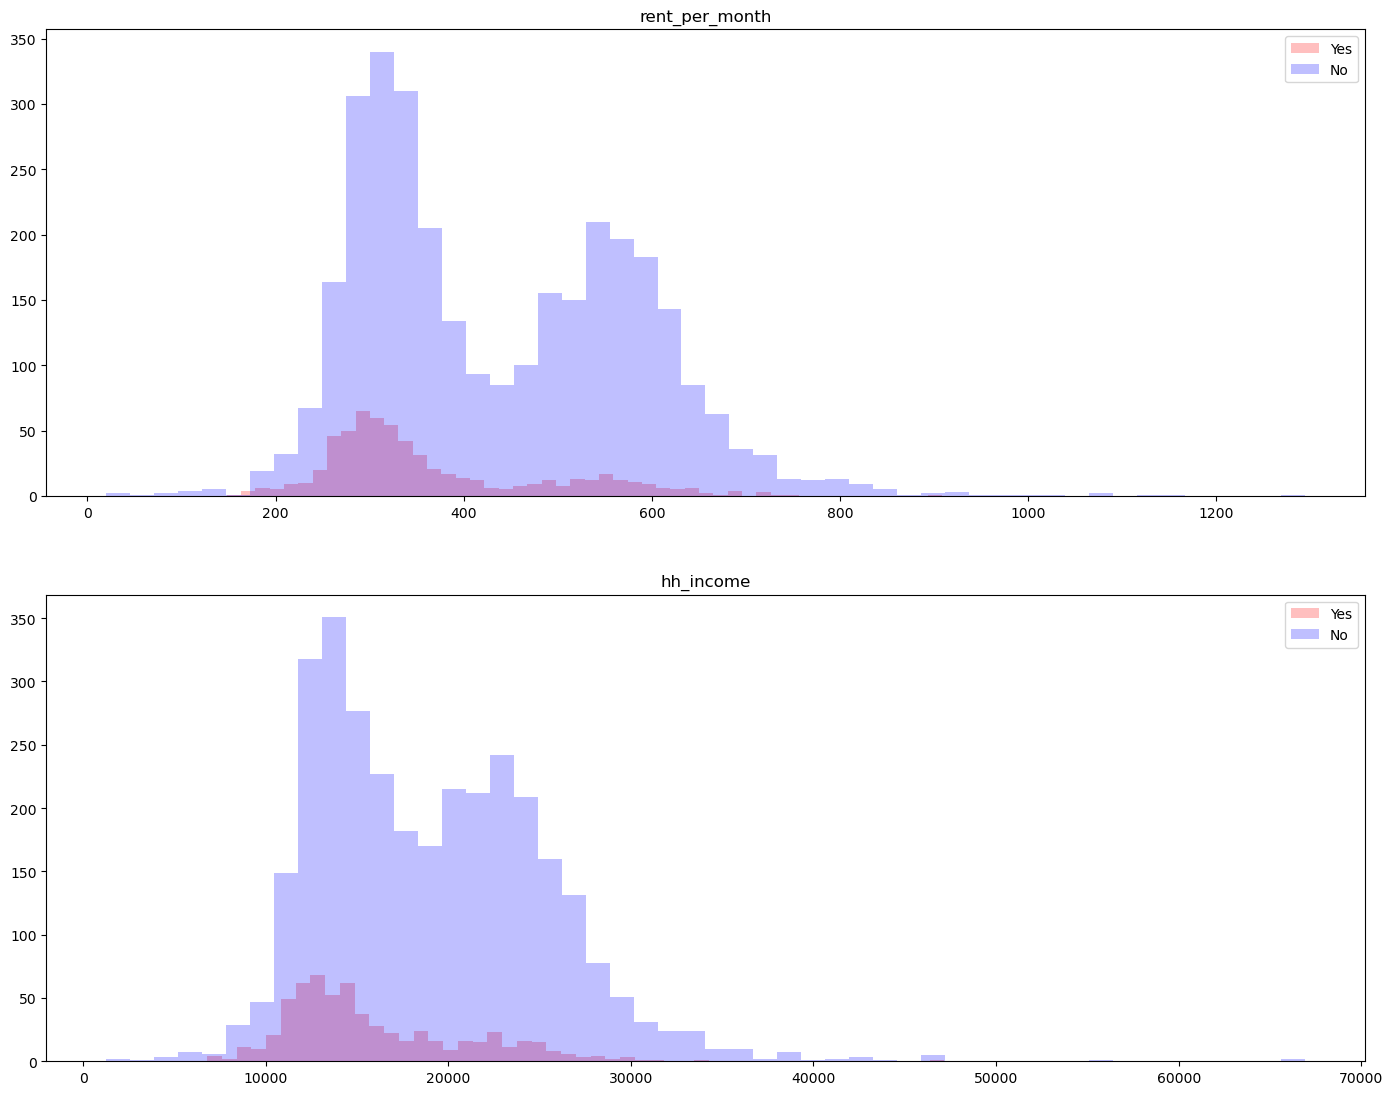

In [6]:
cols_to_plot = [
    'rent_per_month',
    'hh_income'
]
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(15, 12))
fig.tight_layout(pad=5.0)
for idx, column in enumerate(cols_to_plot):
    ax = axes[idx]  # Directly index since it's just a 1D array
    ax.hist(yes[column], bins=50, alpha=0.25, label='Yes', color='red')
    ax.hist(no[column], bins=50, alpha=0.25, label='No', color='blue')
    ax.set_title(column)
    ax.legend()
plt.show()

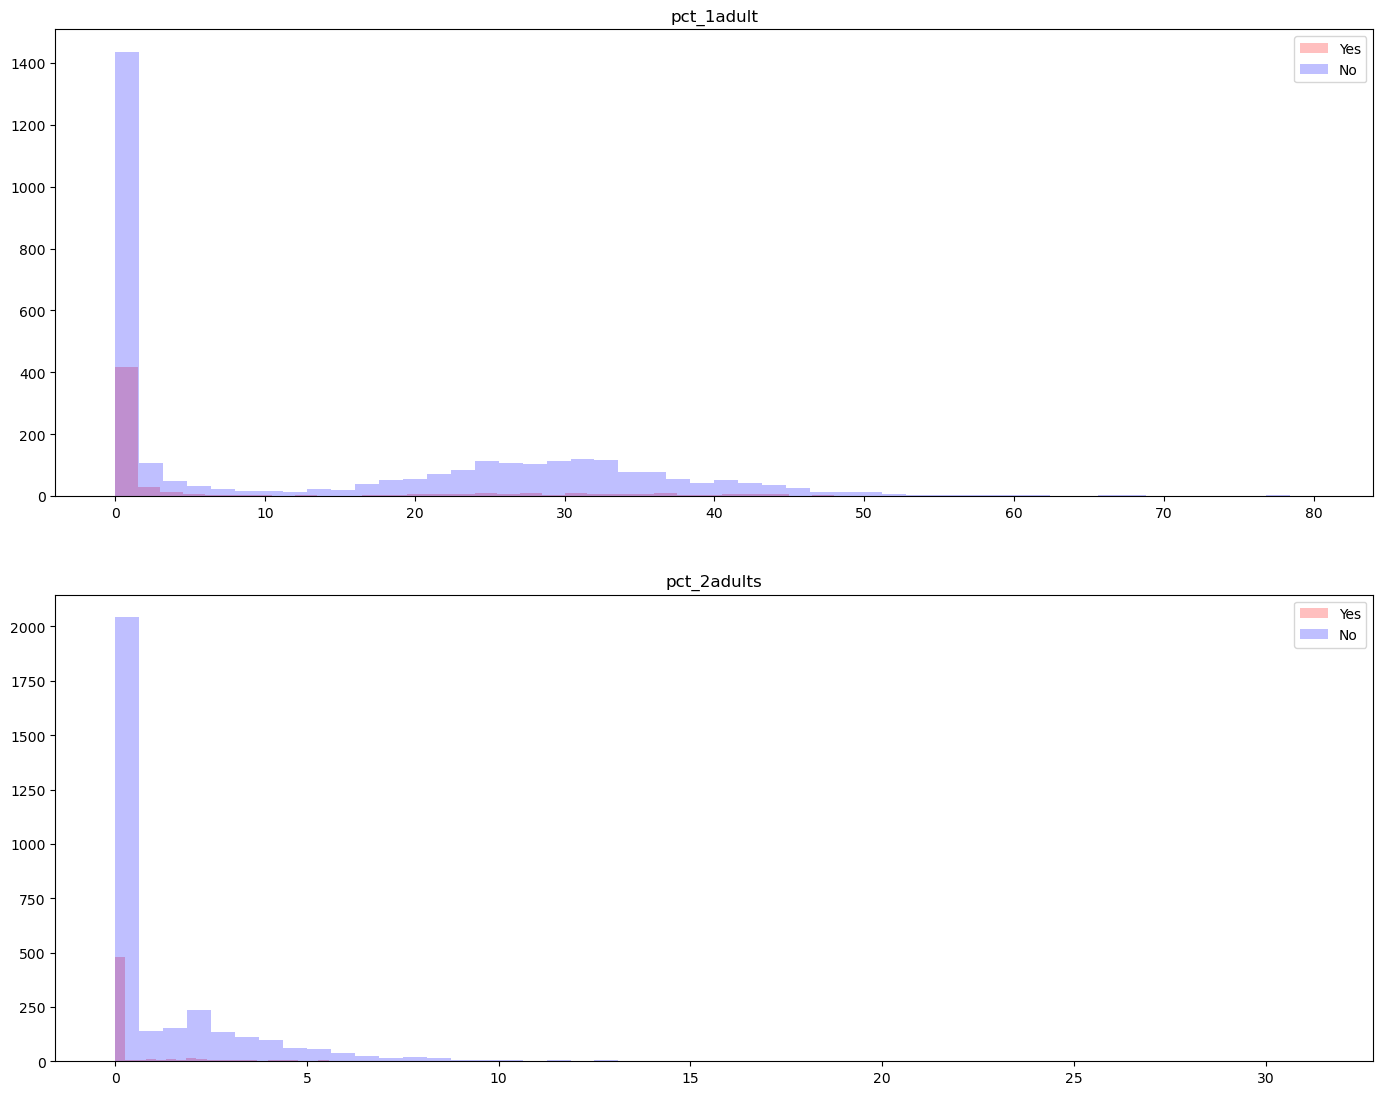

In [7]:
cols_to_plot = [
    'pct_1adult',
    'pct_2adults'
]
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(15, 12))
fig.tight_layout(pad=5.0)
for idx, column in enumerate(cols_to_plot):
    ax = axes[idx]  # Directly index since it's just a 1D array
    ax.hist(yes[column], bins=50, alpha=0.25, label='Yes', color='red')
    ax.hist(no[column], bins=50, alpha=0.25, label='No', color='blue')
    ax.set_title(column)
    ax.legend()
plt.show()

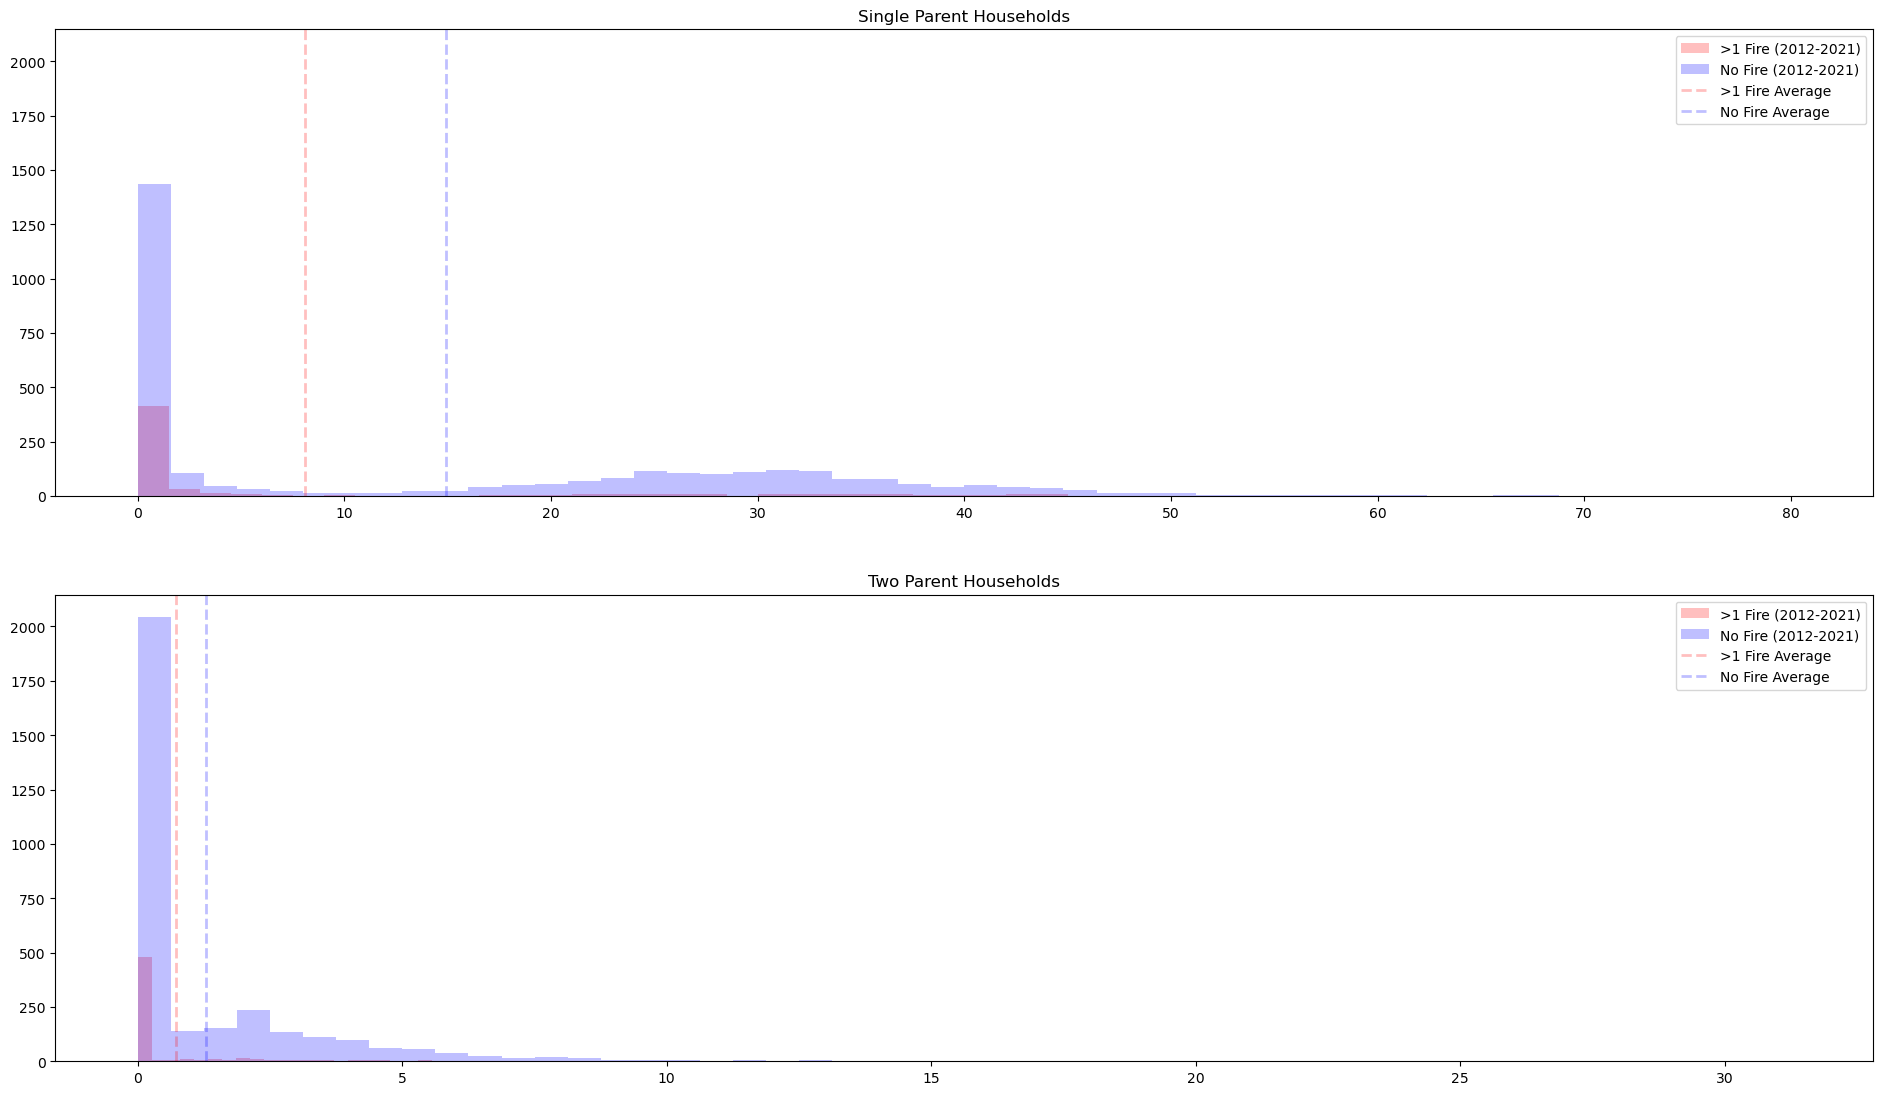

In [8]:
import matplotlib.pyplot as plt

cols_to_plot = [
    'pct_1adult',
    'pct_2adults'
]

# Custom titles based on column interpretations
custom_titles = {
    'pct_1adult': 'Single Parent Households',
    'pct_2adults': 'Two Parent Households',
}

fig, axes = plt.subplots(sharey=True, nrows=2, ncols=1, figsize=(20, 12))
fig.tight_layout(pad=5.0)

for idx, column in enumerate(cols_to_plot):
    ax = axes[idx]
    ax.hist(yes[column], bins=50, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
    ax.hist(no[column], bins=50, alpha=0.25, label='No Fire (2012-2021)', color='blue')
    ax.set_title(custom_titles[column])

    mean_yes = yes[column].mean()
    mean_no = no[column].mean()

    ax.axvline(mean_yes, color='red', linestyle='dashed', alpha=.25, linewidth=2, label='>1 Fire Average')
    ax.axvline(mean_no, color='blue', linestyle='dashed', alpha=.25, linewidth=2, label='No Fire Average')

    ax.legend()

plt.show()


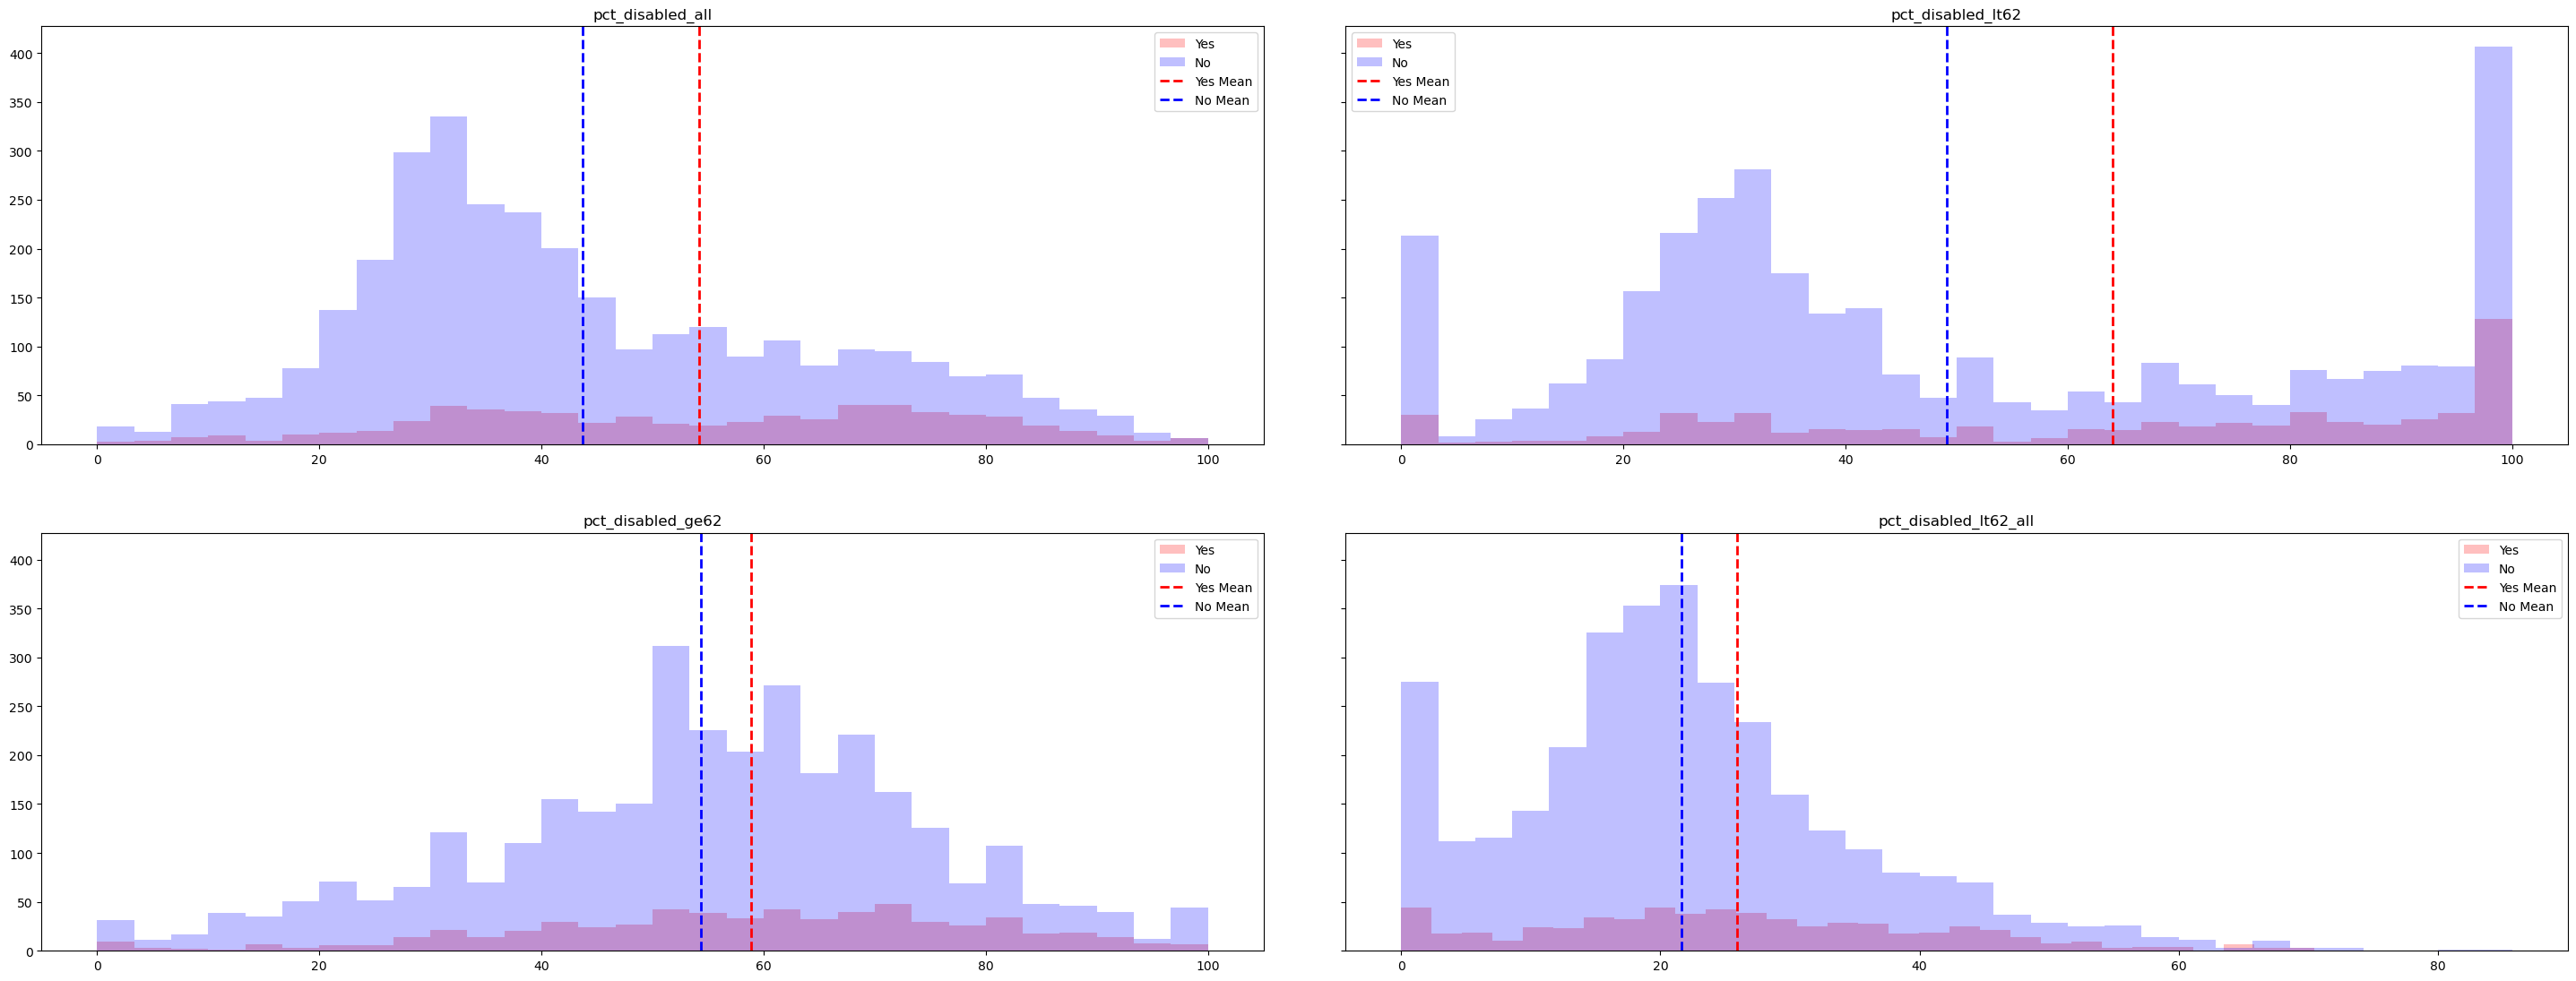

In [9]:
import matplotlib.pyplot as plt

cols_to_plot = [
    'pct_disabled_all',
    'pct_disabled_ge62',
    'pct_disabled_lt62',
    'pct_disabled_lt62_all'
]
fig, axes = plt.subplots(sharey=True, nrows=2, ncols=2, figsize=(30, 12))
fig.tight_layout(pad=5.0)

for idx, column in enumerate(cols_to_plot):
    ax = axes[idx % 2, idx // 2]  # Directly index since it's just a 1D array
    ax.hist(yes[column], bins=30, alpha=0.25, label='Yes', color='red')
    ax.hist(no[column], bins=30, alpha=0.25, label='No', color='blue')
    ax.set_title(column)

    # Plotting vertical lines for the means
    mean_yes = yes[column].mean()
    mean_no = no[column].mean()

    ax.axvline(mean_yes, color='red', linestyle='dashed', linewidth=2, label='Yes Mean')
    ax.axvline(mean_no, color='blue', linestyle='dashed', linewidth=2, label='No Mean')

    ax.legend()

plt.show()


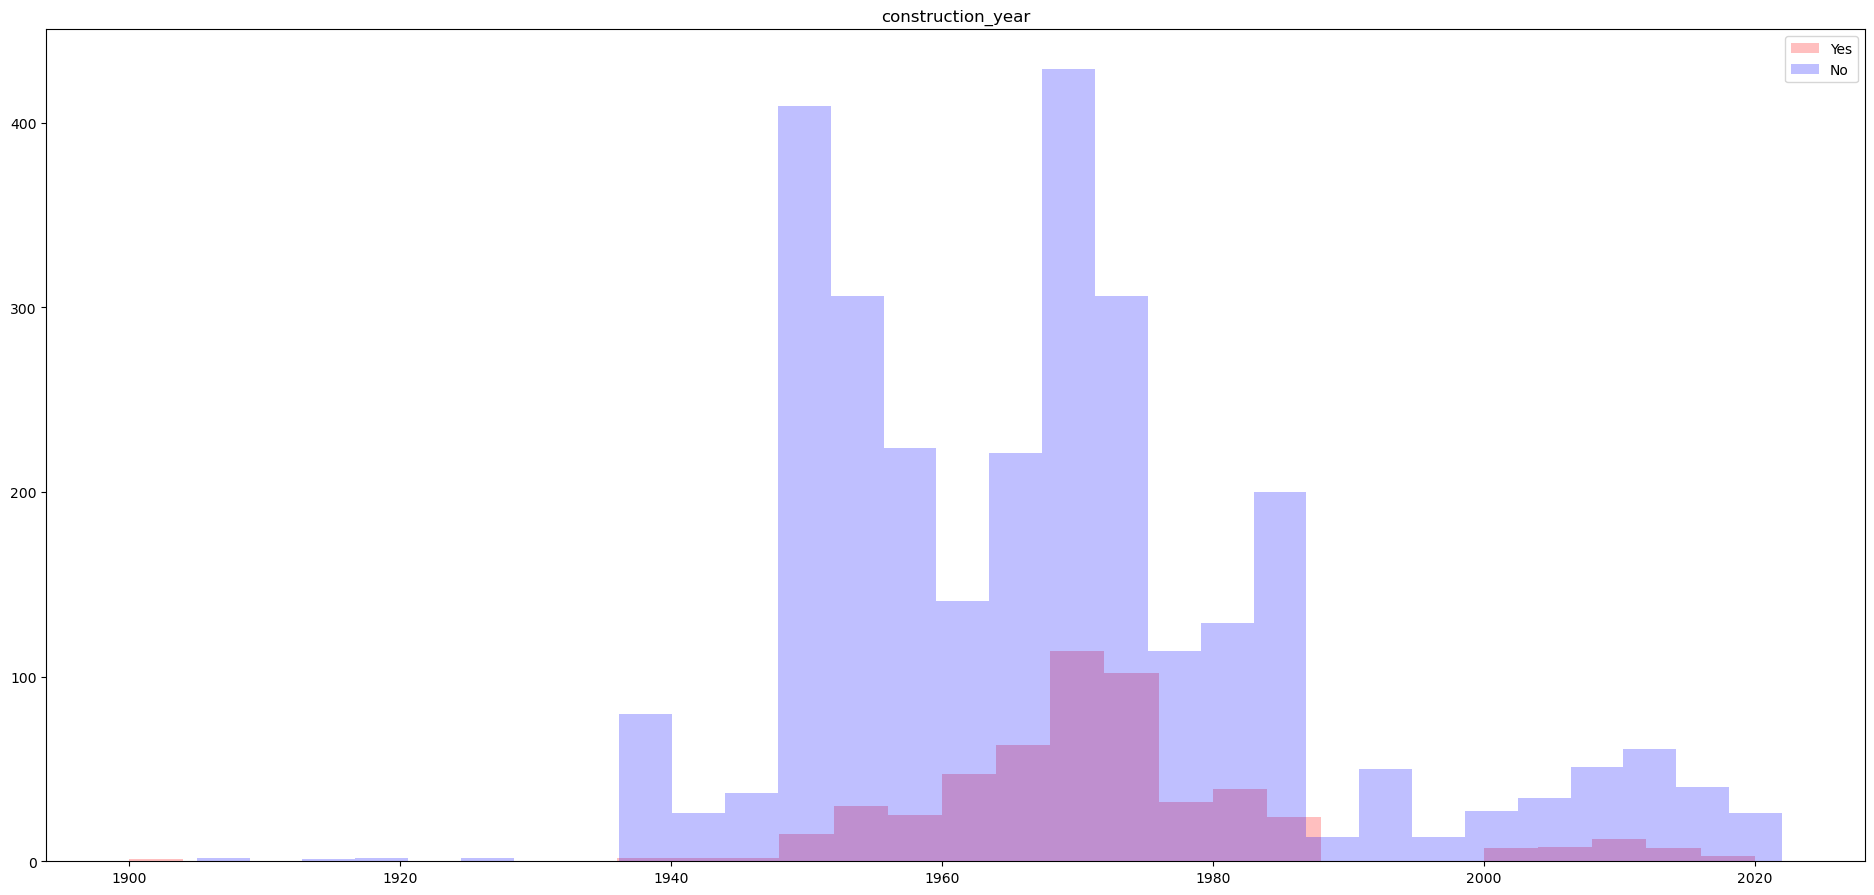

In [10]:
cols_to_plot = [
    'construction_year',
]
fig, ax = plt.subplots(sharey=True, nrows=1, ncols=1, figsize=(20, 10))
fig.tight_layout(pad=5.0)
for idx, column in enumerate(cols_to_plot):
    # ax = axes[idx]  # Directly index since it's just a 1D array
    ax.hist(yes[column], bins=30, alpha=0.25, label='Yes', color='red')
    ax.hist(no[column], bins=30, alpha=0.25, label='No', color='blue')
    ax.set_title(column)
    ax.legend()
plt.show()

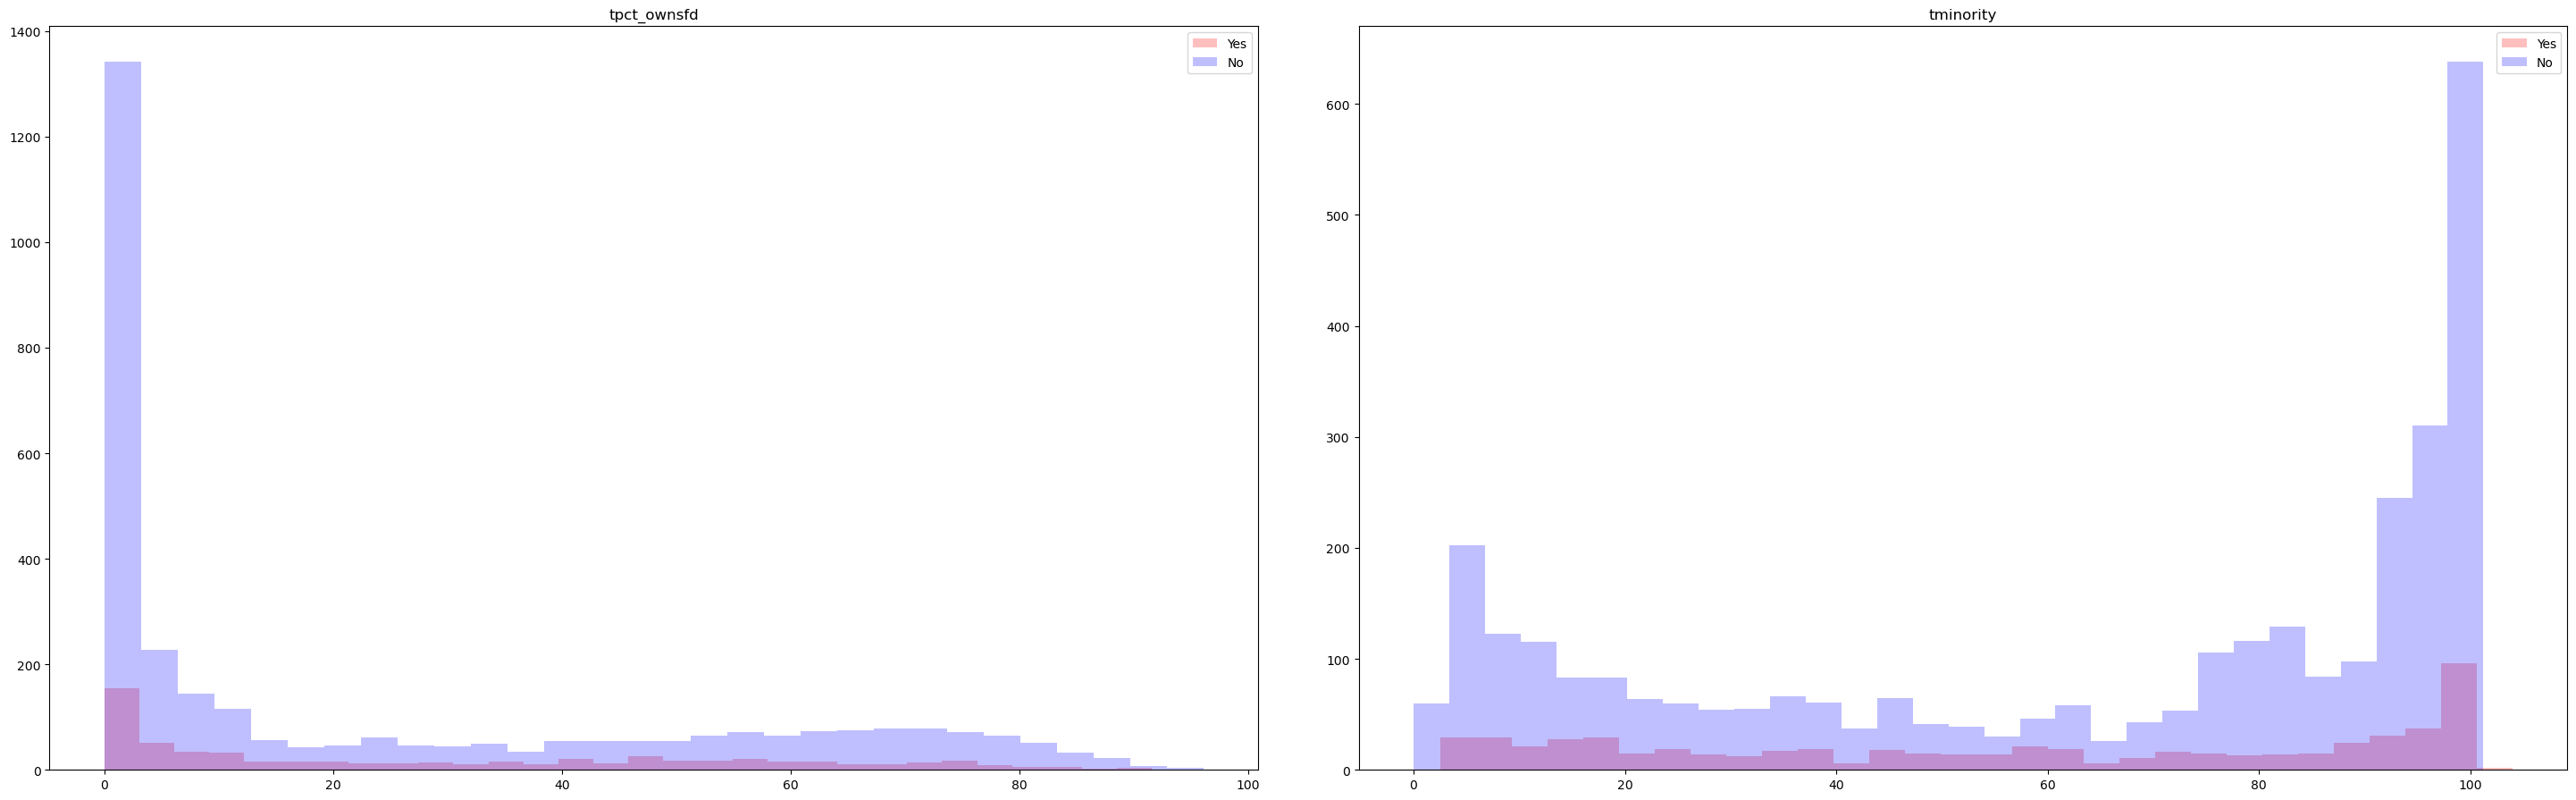

In [11]:
cols_to_plot = [
    'tpct_ownsfd',
    'tminority'
]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
fig.tight_layout(pad=5.0)
for idx, column in enumerate(cols_to_plot):
    ax = axes[idx]
    ax.hist(yes[column], bins=30, alpha=0.25, label='Yes', color='red')
    ax.hist(no[column], bins=30, alpha=0.25, label='No', color='blue')
    ax.set_title(column)
    ax.legend()
plt.show()

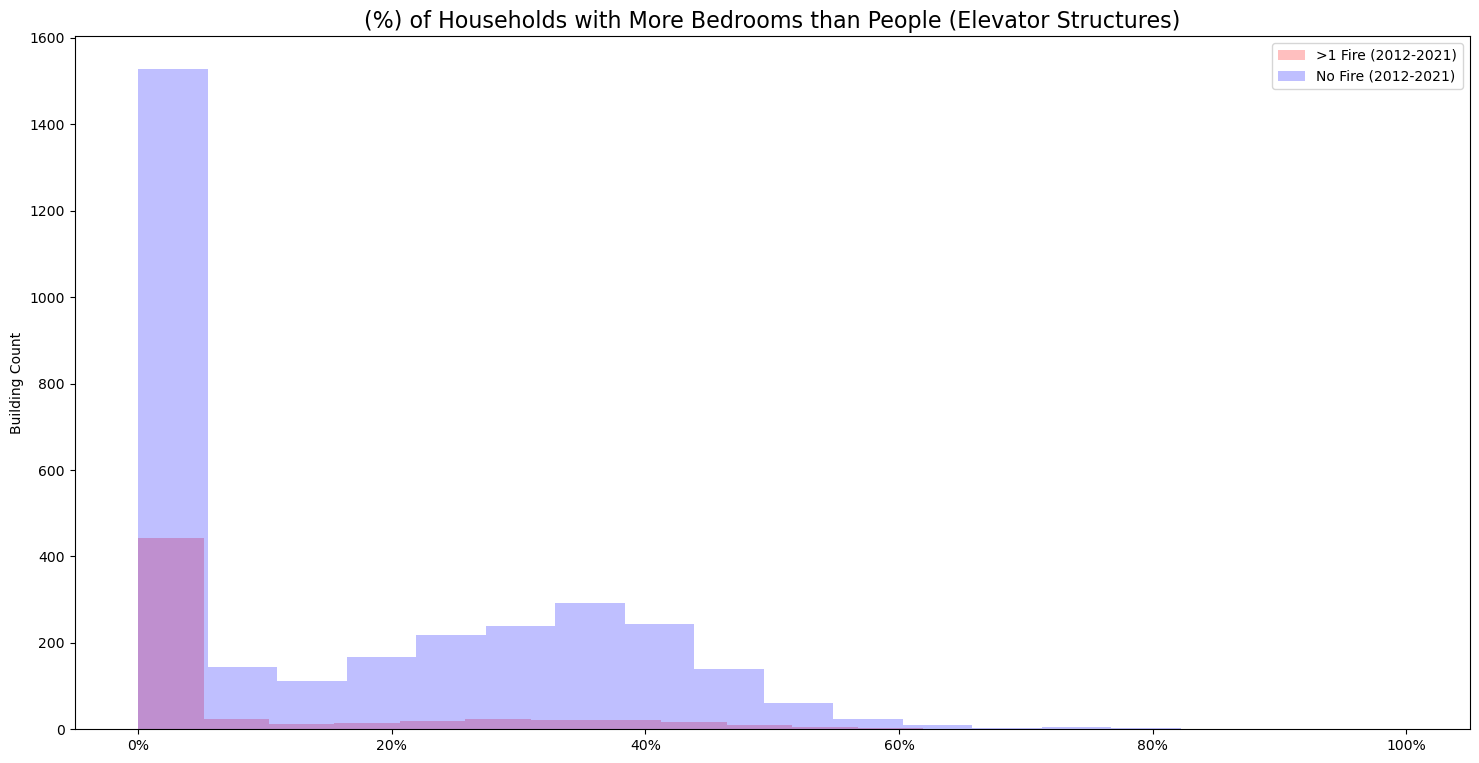

In [12]:
column = 'pct_overhoused'

title = '(%) of Households with More Bedrooms than People (Elevator Structures)'
plt.figure(figsize=(18, 9))
plt.hist(yes[column], bins=15, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
plt.hist(no[column], bins=15, alpha=0.25, label='No Fire (2012-2021)', color='blue')

plt.title(title, fontsize=16)
plt.ylabel('Building Count')
plt.legend()

# Adjust x-tick labels
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, ['{:.0f}%'.format(val) for val in x_ticks])

# Assuming percentage data, setting the upper limit to a bit more than 100 and lower limit a bit below 0.
buffer = 5  # You can adjust this based on your preference
plt.xlim(-buffer, 100 + buffer)

plt.show()


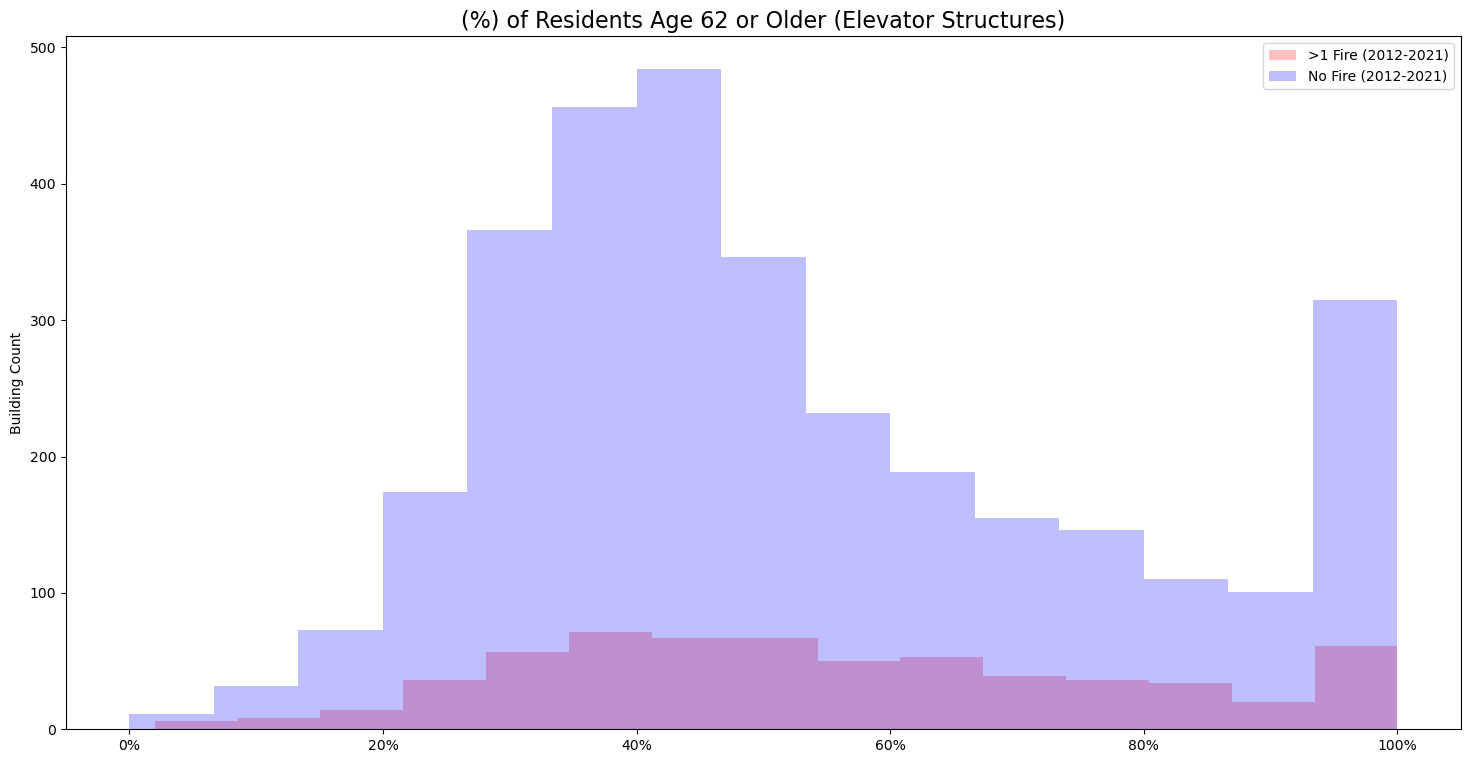

In [13]:
column = 'pct_age62plus'

title = '(%) of Residents Age 62 or Older (Elevator Structures)'
plt.figure(figsize=(18, 9))
plt.hist(yes[column], bins=15, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
plt.hist(no[column], bins=15, alpha=0.25, label='No Fire (2012-2021)', color='blue')

plt.title(title, fontsize=16)
plt.ylabel('Building Count')
plt.legend()

# Adjust x-tick labels
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, ['{:.0f}%'.format(val) for val in x_ticks])

# Assuming percentage data, setting the upper limit to a bit more than 100 and lower limit a bit below 0.
buffer = 5  # You can adjust this based on your preference
plt.xlim(-buffer, 100 + buffer)

plt.show()


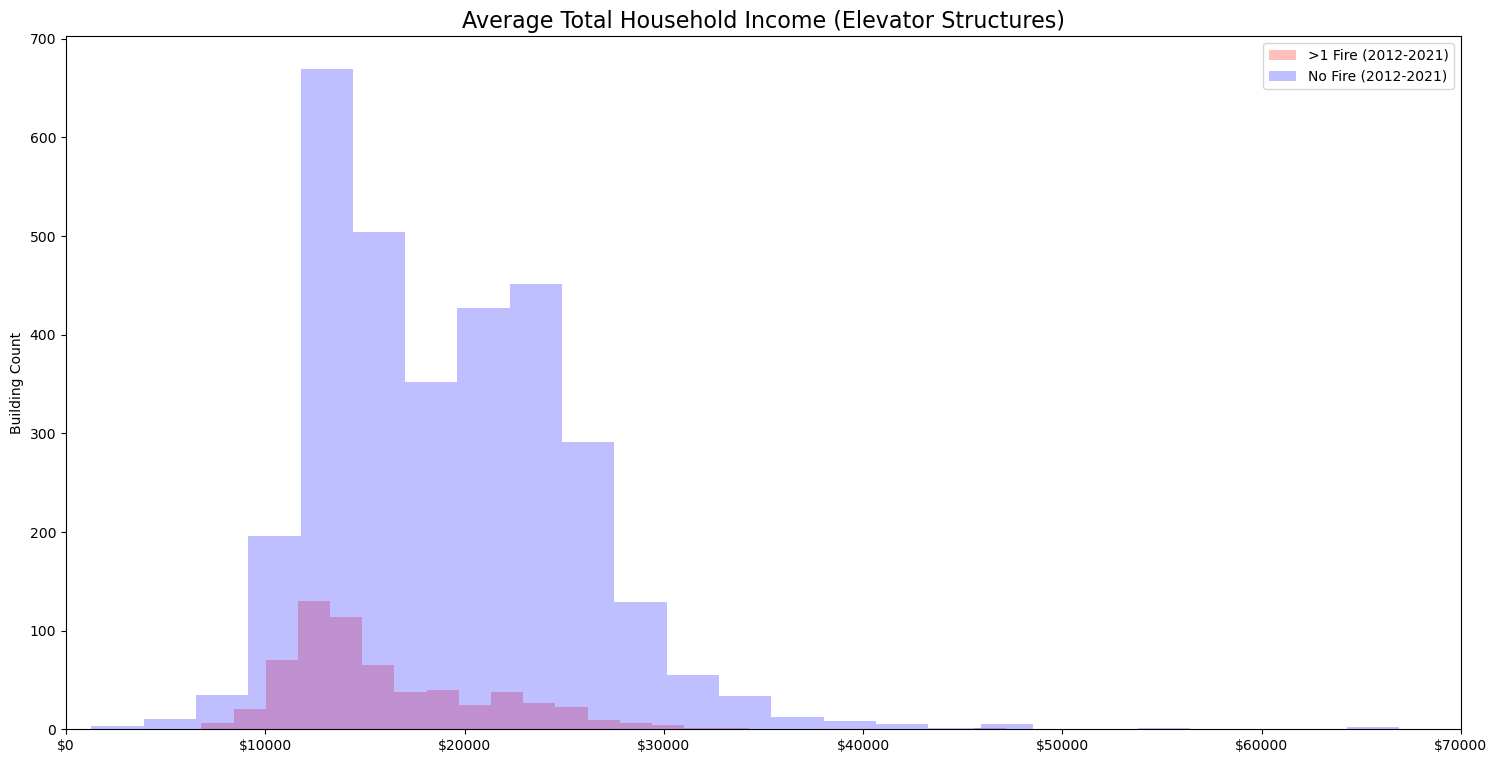

In [14]:
column = 'hh_income'

title = 'Average Total Household Income (Elevator Structures)'
plt.figure(figsize=(18, 9))
plt.hist(yes[column], bins=25, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
plt.hist(no[column], bins=25, alpha=0.25, label='No Fire (2012-2021)', color='blue')

plt.title(title, fontsize=16)
plt.ylabel('Building Count')
plt.legend()

# Adjust x-tick labels
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, ['${:.0f}'.format(val) for val in x_ticks])

plt.xlim(-5, 70000)

plt.show()

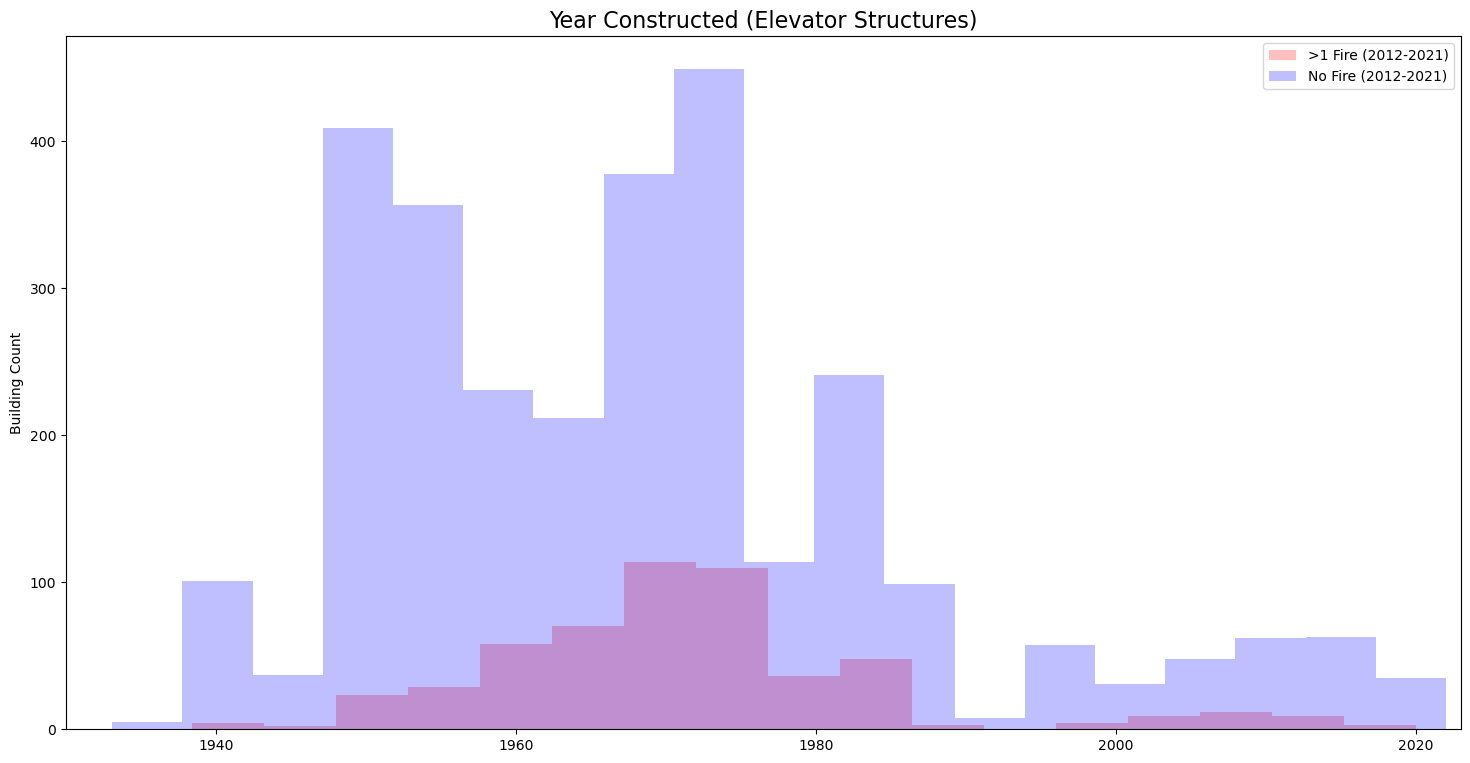

In [15]:
column = 'construction_year'

title = 'Year Constructed (Elevator Structures)'
plt.figure(figsize=(18, 9))
plt.hist(yes[column], bins=25, alpha=0.25, label='>1 Fire (2012-2021)', color='red')
plt.hist(no[column], bins=25, alpha=0.25, label='No Fire (2012-2021)', color='blue')

plt.title(title, fontsize=16)
plt.ylabel('Building Count')
plt.legend()

# Adjust x-tick labels
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, ['{:.0f}'.format(val) for val in x_ticks])
plt.xlim(1930, 2023)
plt.show()

In [16]:
# df = es.copy()

# df['sum_building_fires_15_19'] = df[[f'building_fires_{year}' for year in range(2015, 2020)]].sum(axis=1)

# selected_features = [
#     'sum_building_fires_15_19',
#     'building_fires_2020',
#     'rent_per_month',
#     'tpct_ownsfd',
#     'pct_median',
#     'tminority',
#     'encoded_city',
#     'pct_overhoused',
#     'pct_welfare_major',
#     'pct_occupied',
#     'construction_year',
#     'pct_age85plus',
#     'pct_lt30_median',
#     'encoded_msa_nm',
#     'median_inc_amnt',
#     'pct_lt50_median',
#     'pct_2adults',
#     'pct_1adult',
#     'hh_income',
#     'chldrn_mbr_cnt',
#     'people_total',
#     'eldly_prcnt',
#     'pct_age25_50',
#     'pct_disabled_all',
#     'pct_disabled_ge62',
#     'pct_ge20k',
#     'pct_bed1',
#     'pct_bed2',
#     'pct_bed3',
#     'ur_r',
#     'ur_u'
# ]

# df = df[selected_features]
# plt.figure(figsize=(20, 20))
# sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [17]:
fb = m.copy()
fb['total_indoor'] = fb[[x for x in fb.columns if 'building_fires_' in x]].sum(axis=1)
fb['total_unconfined'] = fb[[x for x in fb.columns if 'inc_type_111_' in x]].sum(axis=1)

In [18]:
fb.groupby('building_type_code_es').total_indoor.sum()

building_type_code_es
0    4496.0
1    8457.0
Name: total_indoor, dtype: float64

In [19]:
fb.groupby('building_type_code_es').total_unconfined.sum()

building_type_code_es
0    1709.0
1     831.0
Name: total_unconfined, dtype: float64

In [20]:
fb.groupby('building_type_code_es').total_units.sum()

building_type_code_es
0    570716
1    358824
Name: total_units, dtype: int64

### Calculate last fire occurence

In [21]:
m = pd.read_csv('./ph_fires_matched_2.1.csv')

In [22]:
def get_last_building_fire(row, last_year):
    for year in range(last_year, 2011, -1): 
        if row[f'building_fires_{year}'] > 0:
            return year
    return -1

def get_last_severe_fire(row, last_year):
    for year in range(last_year, 2011, -1): 
        if ((row[f'inc_type_111_{year}'] > 0) or
           (row[f'oth_inj_{year}'] > 0) or
           (row[f'oth_death_{year}'] > 0) or
           (row[f'prop_loss_{year}'] > 0) or
           (row[f'cont_loss_{year}'] > 0)):
            return year
    return -1

def get_last_loss_fire(row, last_year):
    for year in range(last_year, 2011, -1): 
        if ((row[f'oth_inj_{year}'] > 0) or
           (row[f'oth_death_{year}'] > 0) or
           (row[f'prop_loss_{year}'] > 0) or
           (row[f'cont_loss_{year}'] > 0)):
            return year
    return -1

In [23]:
# l = m[(m.building_type_code_es == 1) | (m.addr_type_h)].copy()
# # l = m

# prevs = []
# for year in range(2021, 2012, -1):
#     yearly_fires = l[l[f'building_fires_{year}'] > 0].copy()
#     yearly_fires['last_fire'] = yearly_fires.apply(get_last_severe_fire, args=(year - 1,), axis=1)
#     print(year, 'Total fires:', len(yearly_fires))
#     display(yearly_fires.groupby('last_fire').size().sort_values(ascending=False))
#     percent_with_prev = len(yearly_fires[yearly_fires.last_fire > 0]) / len(yearly_fires)
#     prevs.append((year, percent_with_prev))
#     print(f'% of total {year} fires with a previous fire:', percent_with_prev)
#     print()


### Looking when the last fire was for public housing buildings

ES, 2021, last damaging fire

Non-ES, 2021, damaging fire

Damaging or unconfined fire, 2021, ES

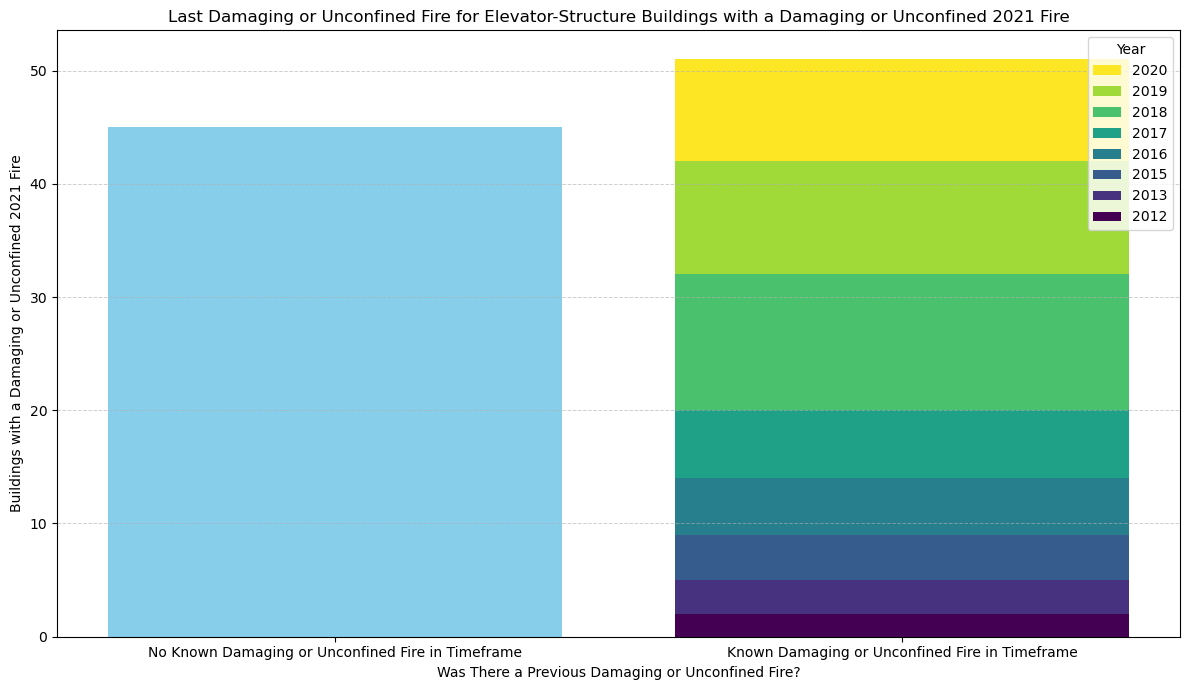

In [24]:
year = 2021
lookback = m[
    ((m[f'inc_type_111_{year}'] > 0) |
    (m[f'oth_inj_{year}'] > 0) |
    (m[f'oth_death_{year}'] > 0) |
    (m[f'prop_loss_{year}'] > 0) |
    (m[f'cont_loss_{year}'] > 0)) &

    (m.building_type_code_es == 1) 
].copy()

lookback['last_fire'] = lookback.apply(get_last_severe_fire, args=(year - 1,), axis=1)

lookback['last_fire'] = lookback['last_fire'].astype(str)
lookback.last_fire = lookback.last_fire.replace('-1', 'None in Timeframe')

lookbackvals = lookback.groupby('last_fire').size().reset_index()

# Separate "None After 2012" from the rest and concatenate them in the desired order
none_after_2012 = lookbackvals[lookbackvals['last_fire'] == 'None in Timeframe']
others = lookbackvals[lookbackvals['last_fire'] != 'None in Timeframe'].sort_values(by='last_fire')

lookbackvals_sorted = pd.concat([none_after_2012, others])

plt.figure(figsize=(12, 7))

none_val = none_after_2012[0].values[0]
plt.bar("No Known Damaging or Unconfined Fire in Timeframe", none_val, color='skyblue')

bottom_val = 0  
colors = plt.cm.viridis(np.linspace(0, 1, len(others))) 
for index, row in others.iterrows():
    plt.bar("Known Damaging or Unconfined Fire in Timeframe", row[0], bottom=bottom_val, color=colors[index], label=row['last_fire'])
    bottom_val += row[0]

plt.xlabel('Was There a Previous Damaging or Unconfined Fire?')
plt.ylabel('Buildings with a Damaging or Unconfined 2021 Fire')
plt.title('Last Damaging or Unconfined Fire for Elevator-Structure Buildings with a Damaging or Unconfined 2021 Fire')
plt.legend(title="Year", loc='upper right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title="Year", loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()

Non-ES, 2021, unconfined or damaging

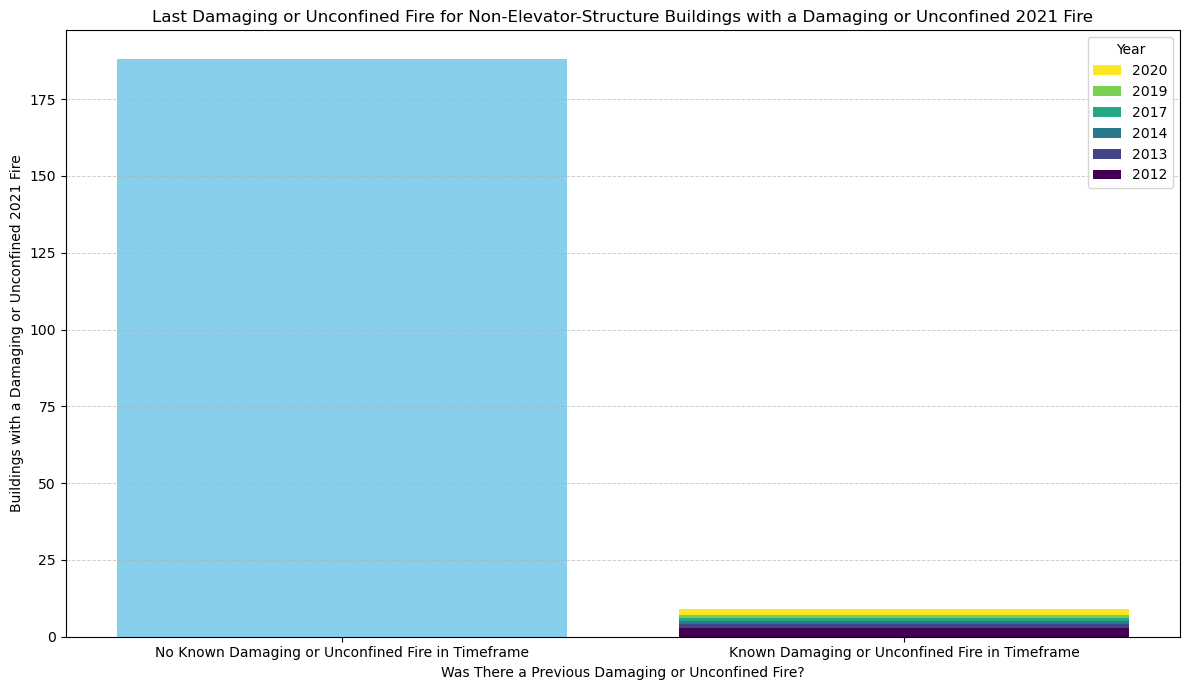

In [25]:
year = 2021
lookback = m[
    ((m[f'inc_type_111_{year}'] > 0) |
    (m[f'oth_inj_{year}'] > 0) |
    (m[f'oth_death_{year}'] > 0) |
    (m[f'prop_loss_{year}'] > 0) |
    (m[f'cont_loss_{year}'] > 0)) &

    (m.building_type_code_es != 1) 
].copy()

lookback['last_fire'] = lookback.apply(get_last_severe_fire, args=(year - 1,), axis=1)

lookback['last_fire'] = lookback['last_fire'].astype(str)
lookback.last_fire = lookback.last_fire.replace('-1', 'None in Timeframe')

lookbackvals = lookback.groupby('last_fire').size().reset_index()

# Separate "None After 2012" from the rest and concatenate them in the desired order
none_after_2012 = lookbackvals[lookbackvals['last_fire'] == 'None in Timeframe']
others = lookbackvals[lookbackvals['last_fire'] != 'None in Timeframe'].sort_values(by='last_fire')

lookbackvals_sorted = pd.concat([none_after_2012, others])

plt.figure(figsize=(12, 7))

none_val = none_after_2012[0].values[0]
plt.bar("No Known Damaging or Unconfined Fire in Timeframe", none_val, color='skyblue')

bottom_val = 0  
colors = plt.cm.viridis(np.linspace(0, 1, len(others))) 
for index, row in others.iterrows():
    plt.bar("Known Damaging or Unconfined Fire in Timeframe", row[0], bottom=bottom_val, color=colors[index], label=row['last_fire'])
    bottom_val += row[0]

plt.xlabel('Was There a Previous Damaging or Unconfined Fire?')
plt.ylabel('Buildings with a Damaging or Unconfined 2021 Fire')
plt.title('Last Damaging or Unconfined Fire for Non-Elevator-Structure Buildings with a Damaging or Unconfined 2021 Fire')
plt.legend(title="Year", loc='upper right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title="Year", loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()

ES, any indoor fire, 2021

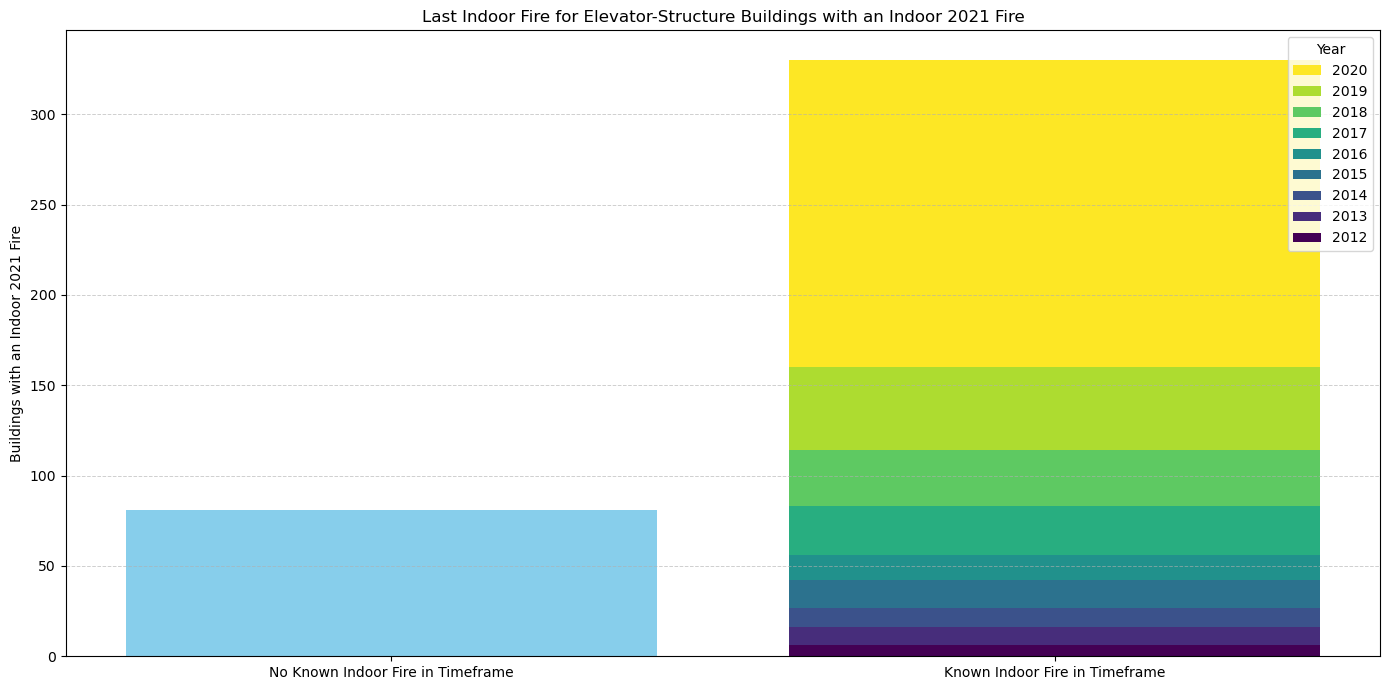

In [64]:
year = 2021
lookback = m[
    ((m[f'building_fires_{year}'] > 0)) &

    (m.building_type_code_es == 1) 
].copy()

lookback['last_fire'] = lookback.apply(get_last_building_fire, args=(year - 1,), axis=1)

lookback['last_fire'] = lookback['last_fire'].astype(str)
lookback.last_fire = lookback.last_fire.replace('-1', 'None in Timeframe')

lookbackvals = lookback.groupby('last_fire').size().reset_index()

# Separate "None After 2012" from the rest and concatenate them in the desired order
none_after_2012 = lookbackvals[lookbackvals['last_fire'] == 'None in Timeframe']
others = lookbackvals[lookbackvals['last_fire'] != 'None in Timeframe'].sort_values(by='last_fire')

lookbackvals_sorted = pd.concat([none_after_2012, others])

plt.figure(figsize=(14, 7))

none_val = none_after_2012[0].values[0]
plt.bar("No Known Indoor Fire in Timeframe", none_val, color='skyblue')

bottom_val = 0  
colors = plt.cm.viridis(np.linspace(0, 1, len(others))) 
for index, row in others.iterrows():
    plt.bar("Known Indoor Fire in Timeframe", row[0], bottom=bottom_val, color=colors[index], label=row['last_fire'])
    bottom_val += row[0]

plt.xlabel('')
plt.ylabel('Buildings with an Indoor 2021 Fire')
plt.title('Last Indoor Fire for Elevator-Structure Buildings with an Indoor 2021 Fire')
plt.legend(title="Year", loc='upper right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title="Year", loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()

Non-ES, 2021, any indoor fire

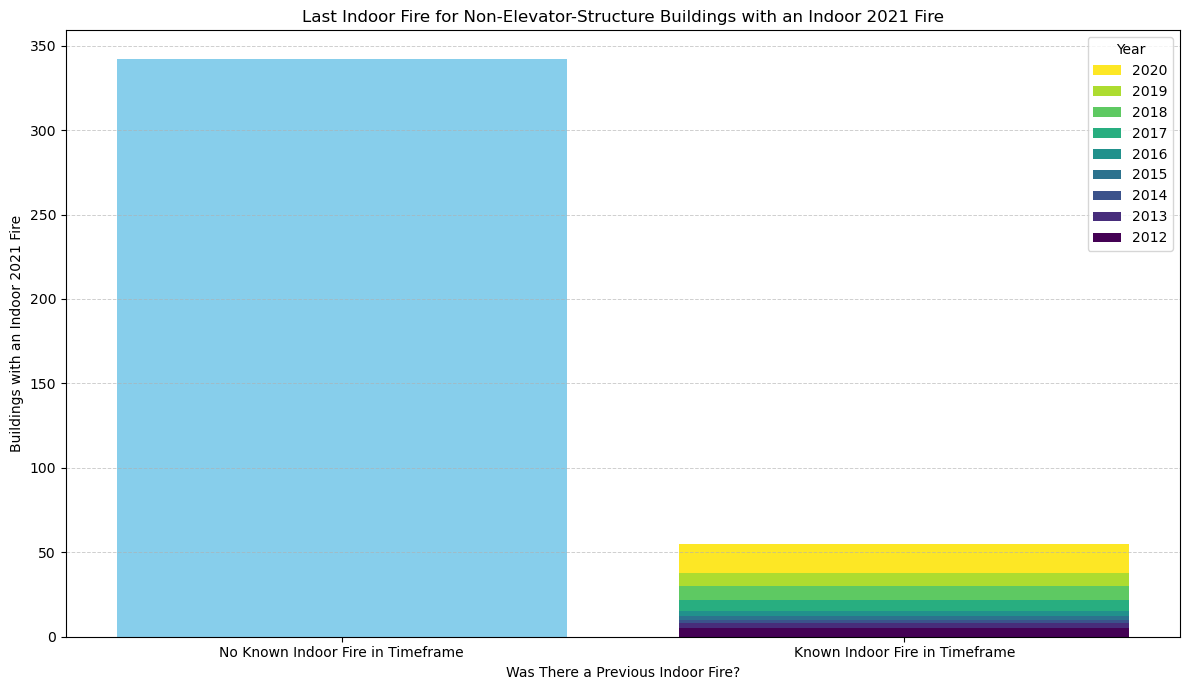

In [27]:
year = 2021
lookback = m[
    ((m[f'building_fires_{year}'] > 0)) &

    (m.building_type_code_es != 1) 
].copy()

lookback['last_fire'] = lookback.apply(get_last_building_fire, args=(year - 1,), axis=1)

lookback['last_fire'] = lookback['last_fire'].astype(str)
lookback.last_fire = lookback.last_fire.replace('-1', 'None in Timeframe')

lookbackvals = lookback.groupby('last_fire').size().reset_index()

# Separate "None After 2012" from the rest and concatenate them in the desired order
none_after_2012 = lookbackvals[lookbackvals['last_fire'] == 'None in Timeframe']
others = lookbackvals[lookbackvals['last_fire'] != 'None in Timeframe'].sort_values(by='last_fire')

lookbackvals_sorted = pd.concat([none_after_2012, others])

plt.figure(figsize=(12, 7))

none_val = none_after_2012[0].values[0]
plt.bar("No Known Indoor Fire in Timeframe", none_val, color='skyblue')

bottom_val = 0  
colors = plt.cm.viridis(np.linspace(0, 1, len(others))) 
for index, row in others.iterrows():
    plt.bar("Known Indoor Fire in Timeframe", row[0], bottom=bottom_val, color=colors[index], label=row['last_fire'])
    bottom_val += row[0]

plt.xlabel('Was There a Previous Indoor Fire?')
plt.ylabel('Buildings with an Indoor 2021 Fire')
plt.title('Last Indoor Fire for Non-Elevator-Structure Buildings with an Indoor 2021 Fire')
plt.legend(title="Year", loc='upper right')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title="Year", loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()

ES with at least one fire - last 10 years

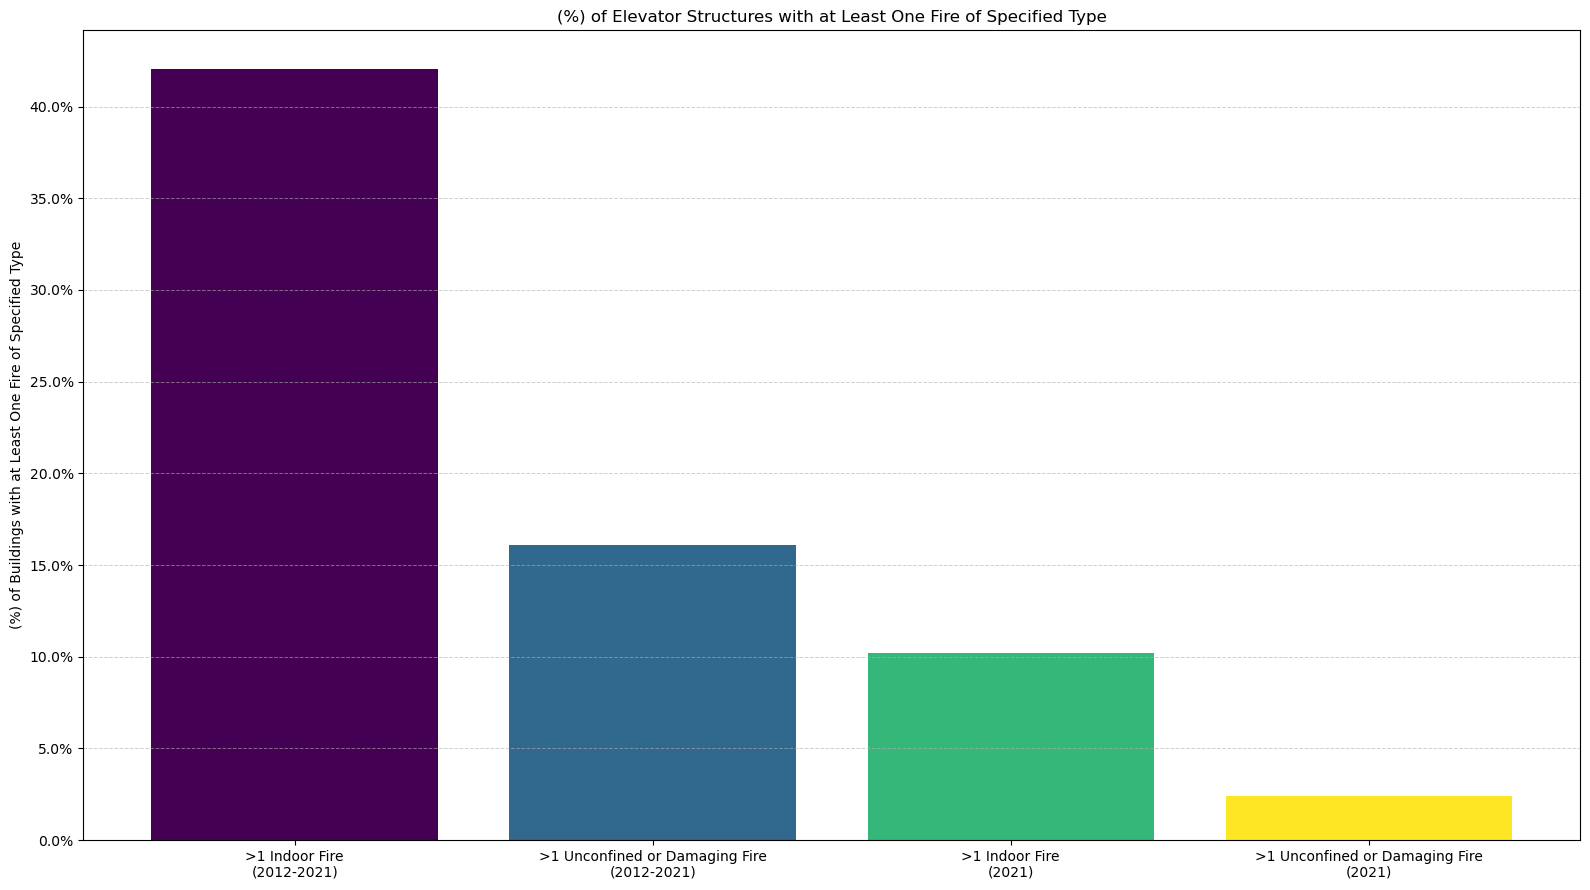

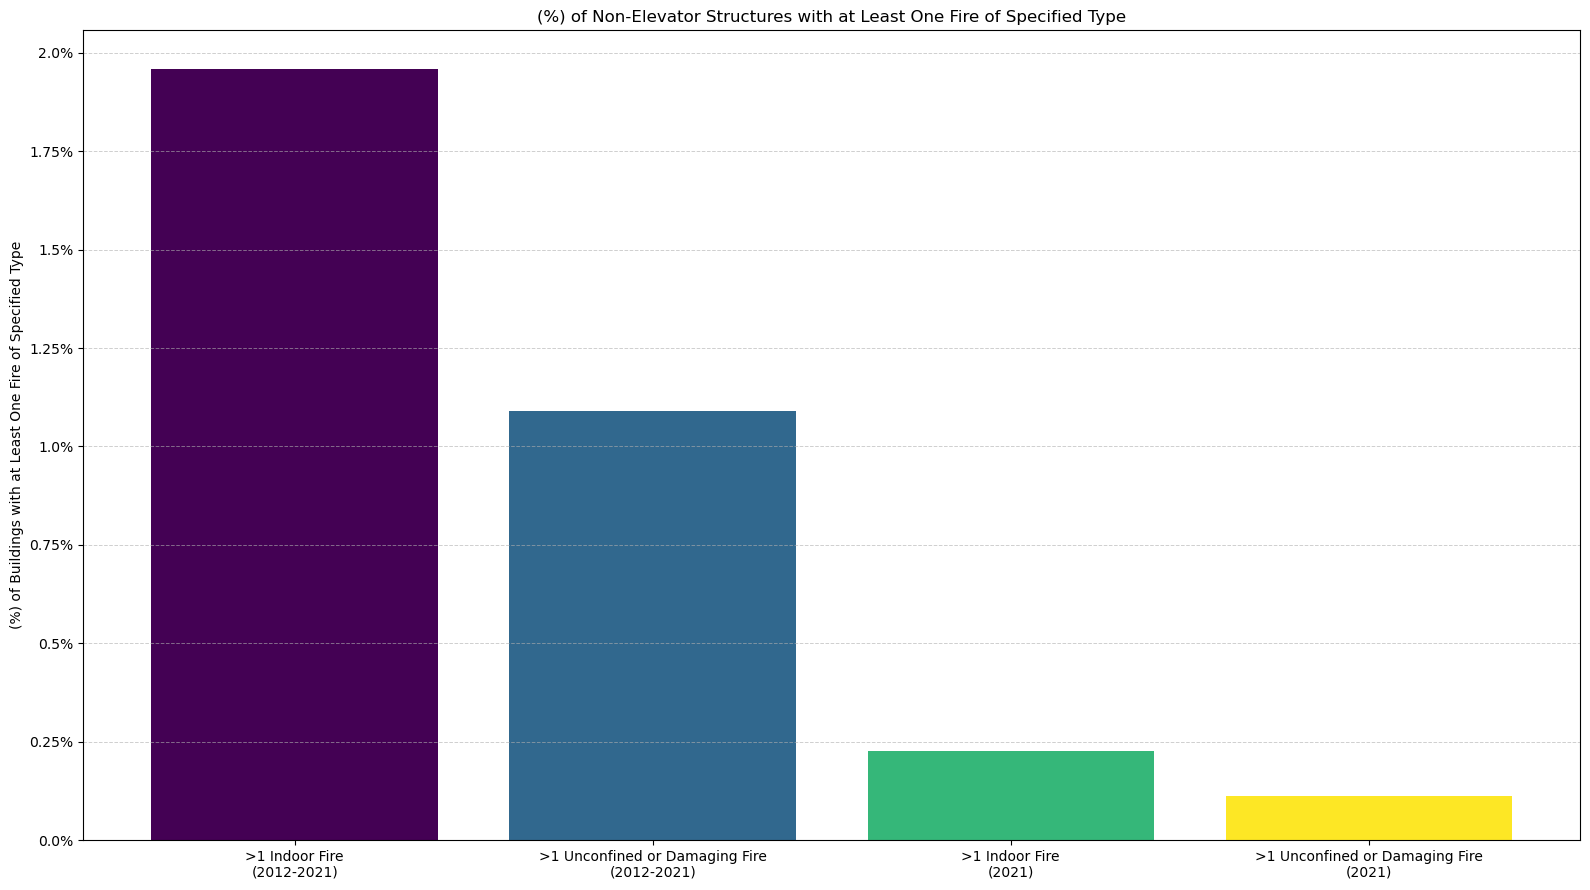

In [28]:
def fire_types_proportions(filter, title): 
    lookback = m[filter].copy()
    lookback['indoor_fire'] = lookback.apply(get_last_building_fire, args=(2021,), axis=1)
    lookback['unconfined_or_damage'] = lookback.apply(get_last_severe_fire, args=(2021,), axis=1)
    indoor_fire_proportion = lookback[lookback.indoor_fire > 0].shape[0] / len(lookback)
    unconfined_or_damage_proportion = lookback[lookback.unconfined_or_damage > 0].shape[0] / len(lookback)

    indoor_fire_proportion21 = len(lookback[lookback.building_fires_2021 > 0]) / len(lookback)
    unconfined_or_damage_proportion21 = len(lookback[
        (lookback.inc_type_111_2021 > 0) |
        (lookback.oth_death_2021 > 0) | 
        (lookback.oth_inj_2021 > 0) | 
        (lookback.prop_loss_2021 > 0) | 
        (lookback.cont_loss_2021 > 0)
    ]) / len(lookback)

    labels = ['>1 Indoor Fire\n(2012-2021)', '>1 Unconfined or Damaging Fire\n(2012-2021)', '>1 Indoor Fire\n(2021)', '>1 Unconfined or Damaging Fire\n(2021)']

    indoor_fire_proportion21 *= 100
    unconfined_or_damage_proportion21 *= 100
    indoor_fire_proportion *= 100
    unconfined_or_damage_proportion *= 100

    proportions = [indoor_fire_proportion, unconfined_or_damage_proportion, indoor_fire_proportion21, unconfined_or_damage_proportion21]

    def custom_percentage(x, pos):
        return f"{x}%"

    plt.figure(figsize=(16, 9))
    colors = plt.cm.viridis(np.linspace(0, 1, len(proportions)))

    for i, proportion in enumerate(proportions):
        plt.bar(labels[i], proportion, color=colors[i])

    plt.ylabel('(%) of Buildings with at Least One Fire of Specified Type')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

    from matplotlib.ticker import FuncFormatter
    plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_percentage))

    plt.tight_layout()
    plt.show()


fire_types_proportions(m.building_type_code_es == 1, '(%) of Elevator Structures with at Least One Fire of Specified Type')
fire_types_proportions(m.building_type_code_es != 1, '(%) of Non-Elevator Structures with at Least One Fire of Specified Type')

### Precision-recall using simple model

              precision    recall  f1-score   support

       False       1.00      0.98      0.99    174625
        True       0.02      0.14      0.03       397

    accuracy                           0.98    175022
   macro avg       0.51      0.56      0.51    175022
weighted avg       1.00      0.98      0.99    175022



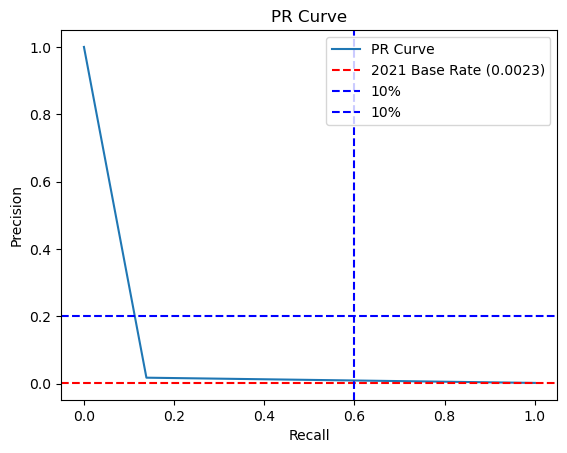

In [29]:
year = 2021
h = m[
    (m.building_type_code_es != 1)].copy()

h['y_pred_severe'] = h.apply(get_last_building_fire, args=(year - 1,), axis=1) > 0
h['y_true'] = h[f'building_fires_{year}'] > 0


# (
#     (h[f'inc_type_111_{year}'] > 0) |
#     (h[f'oth_inj_{year}'] > 0) |
#     (h[f'oth_death_{year}'] > 0) |
#     (h[f'prop_loss_{year}'] > 0) |
#     (h[f'cont_loss_{year}'] > 0)
# )



from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

report = classification_report(h.y_true, h.y_pred_severe)
print(report)

precision, recall, thresholds = precision_recall_curve(h.y_true, h.y_pred_severe)

plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")
base_rate = len(h[h.y_true == True]) / len(h)
plt.axhline(base_rate, color='r', linestyle='--', label=f'2021 Base Rate ({round(base_rate, 4)})')

plt.axhline(.2, color='b', linestyle='--', label=f'10%')
plt.axvline(.6, color='b', linestyle='--', label=f'10%')

plt.legend()
plt.show()


### Quick analysis of buildings with recurring fires

In [30]:
es = m[m.building_type_code_es == 1].copy()

40% of all units are elevator structures.

In [31]:
es.total_units.sum() / m.total_units.sum()

0.38602319426813264

Even though they only include 2% of buildings.

In [32]:
len(es) / len(m)

0.022458292142111112

In [33]:
fires = [x for x in es.columns if 'building_fires_' in x]

es['had_fires'] = es[fires].sum(axis=1) > 0

type111 = [x for x in es.columns if 'inc_type_111_' in x]
prop = [x for x in es.columns if 'prop_loss' in x]
cont = [x for x in es.columns if 'cont_loss' in x]
death = [x for x in es.columns if 'oth_death' in x]
injury = [x for x in es.columns if 'oth_inj' in x]

es['had_severe_fires'] = (es[type111].sum(axis=1) > 0) | (es[prop].sum(axis=1) > 0) | (es[cont].sum(axis=1) > 0) | (es[death].sum(axis=1) > 0) | (es[injury].sum(axis=1) > 0)

es['had_fire_loss'] = (es[prop].sum(axis=1) > 0) | (es[cont].sum(axis=1) > 0) | (es[death].sum(axis=1) > 0) | (es[injury].sum(axis=1) > 0)

About a quarter of ES had a fire in the last 10 years.

In [34]:
print(es[es.had_fires].shape[0] / len(es))
print(es[es.had_severe_fires].shape[0] / len(es))
print(es[es.had_fire_loss].shape[0] / len(es))

0.42054215369311115
0.16065655309624471
0.09052474508828649


In [35]:
es[
    (es.oth_death_2021 > 0) |
    (es.oth_inj_2021 > 0) |
    (es.cont_loss_2021 > 0) |
    (es.prop_loss_2021 > 0) 

].apply(get_last_loss_fire, args=(2021 - 1,), axis=1).reset_index().groupby(0).size()


0
-1       25
 2012     2
 2013     1
 2014     1
 2015     2
 2016     2
 2017     4
 2018     5
 2019     7
 2020     1
dtype: int64

In [36]:
corrs = []
for col in es.select_dtypes(include='number').columns:
    if es[col].isna().sum() / len(es) < .9 and '2012' not in col and '2013' not in col and '2014' not in col and '2015' not in col and '2016' not in col and '2017'  not in col and '2018' not in col and '2019' not in col and '2020' not in col and '2021' not in col:
        corrs.append((col, es[col].corr(es.had_fires)))
corrs = pd.DataFrame(corrs, columns=['col', 'corr'])

pd.set_option('display.max_rows', 45)
display(corrs.dropna().sort_values('corr').tail(45))
pd.set_option('display.max_rows', 10)

,col,corr
91,dev_spending_per_month,0.064389
118,dev_pct_black,0.067636
114,dev_pct_age51_61,0.069058
209,"pha_ha_low_rent_size_category_large (1,000-4,999)",0.072570
210,pha_ha_low_rent_size_category_medium high (300...,0.072655
43,pct_black,0.073989
239,dev_scattered_site_ind_n,0.075102
172,pha_ha_section_8_size_category_medium high (30...,0.075680
34,pct_disabled_lt62,0.076104
5,regular_vacant,0.077067


### MC simulation

In [37]:
es = m[m.building_type_code_es == 1].copy()
# rate = len(es[
#     (es.inc_type_111_2021 > 0) |
#     (es.oth_death_2021 > 0) |
#     (es.oth_inj_2021 > 0) |
#     (es.prop_loss_2021 > 0) |
#     (es.cont_loss_2021 > 0) 
# ]) / len(es)
rate = len(es[
    (es.building_fires_2021 > 0)
]) / len(es)
population_size = len(es)
print(population_size, rate)

4021 0.10221337975627953


Text(0.5, 0, 'Number of Overlapping Fires in Random Simulation')

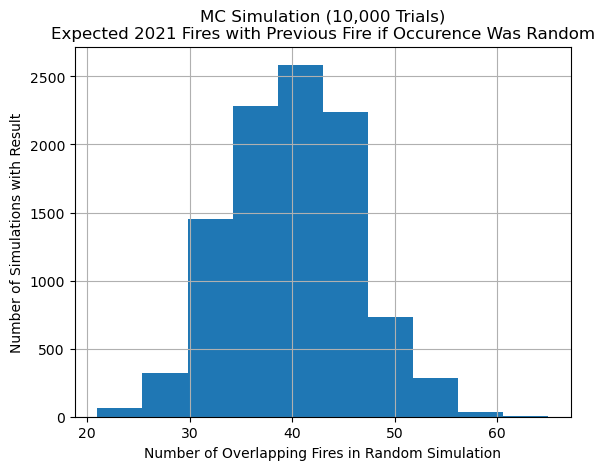

In [38]:
import random

years = 1
counts = []
for i in range(10000):
    espop = [0 for x in range(population_size)]
    for x in range(int(population_size * rate * years)):  
        rand_index = random.randint(1, population_size - 1)
        espop[rand_index] += 1

    count = 0
    for x in range(int(population_size * rate)): 
        rand_index = random.randint(1, population_size - 1)
        if espop[rand_index] > 0:
            count += 1
    counts.append(count)

pd.DataFrame(counts).hist(bins=10)
plt.title('MC Simulation (10,000 Trials)\nExpected 2021 Fires with Previous Fire if Occurence Was Random')
plt.ylabel('Number of Simulations with Result')
plt.xlabel('Number of Overlapping Fires in Random Simulation')

### Differences in buildings with some fires

In [39]:
m = pd.read_csv('./ph_fires_matched_2.1.csv')

In [40]:
es = m[m.building_type_code_es == 1].copy()
nes = m[m.building_type_code_es != 1].copy()

In [41]:
fires = [x for x in es.columns if 'building_fires_' in x]
es['total_fires'] = es[fires].sum(axis=1)
es['yes_total_fires'] = es.total_fires > 0

prop = [x for x in es.columns if 'prop_loss_' in x]
cont = [x for x in es.columns if 'cont_loss_' in x]
injury = [x for x in es.columns if 'oth_inj_' in x]
death = [x for x in es.columns if 'oth_death_' in x]
es['loss_fires'] = es[prop].sum(axis=1) + es[cont].sum(axis=1) + es[injury].sum(axis=1) + es[death].sum(axis=1)
es['yes_loss_fires'] = es.loss_fires > 0

In [42]:
nes['total_fires'] = nes[fires].sum(axis=1)
nes['yes_total_fires'] = nes.total_fires > 0
nes['loss_fires'] = nes[prop].sum(axis=1) + nes[cont].sum(axis=1) + nes[injury].sum(axis=1) + nes[death].sum(axis=1)
nes['yes_loss_fires'] = nes.loss_fires > 0

In [43]:
corrs = []
for col in es.select_dtypes(include='number').columns:
    if es[col].isna().sum() / len(es) < .9 and '2012' not in col and '2013' not in col and '2014' not in col and '2015' not in col and '2016' not in col and '2017'  not in col and '2018' not in col and '2019' not in col and '2020' not in col and '2021' not in col:
        corrs.append((col, es[col].corr(es.yes_loss_fires)))
corrs = pd.DataFrame(corrs, columns=['col', 'corr'])

pd.set_option('display.max_rows', 45)
display(corrs.dropna().sort_values('corr').head(45))
pd.set_option('display.max_rows', 10)

,col,corr
102,dev_pct_median,-0.251407
98,dev_pct_ge20k,-0.237949
107,dev_pct_female_head,-0.236481
32,pct_female_head,-0.235419
92,dev_hh_income,-0.233568
90,dev_rent_per_month,-0.231932
68,pha_total_units,-0.229580
137,pha_capfund_amnt,-0.229109
27,pct_median,-0.228997
82,dev_pha_total_units,-0.228977


In [44]:
corrs = []
for col in nes.select_dtypes(include='number').columns:
    if nes[col].isna().sum() / len(nes) < .9 and '2012' not in col and '2013' not in col and '2014' not in col and '2015' not in col and '2016' not in col and '2017'  not in col and '2018' not in col and '2019' not in col and '2020' not in col and '2021' not in col:
        corrs.append((col, nes[col].corr(nes.yes_total_fires)))
corrs = pd.DataFrame(corrs, columns=['col', 'corr'])

pd.set_option('display.max_rows', 45)
display(corrs.dropna().sort_values('corr').tail(45))
pd.set_option('display.max_rows', 10)

,col,corr
161,apt_type_missing_value,0.028623
88,pha_pct_lt80_median,0.031367
47,dev_pct_lt50_median,0.031893
34,dev_rent_per_month,0.032130
235,std_st_pa,0.032455
187,ur_u,0.034149
108,msgusps_90% overall probable correctness,0.034301
80,pha_opfund_amnt_prev_yr,0.034896
14,dev_chldrn_mbr_cnt,0.035054
28,dev_number_reported,0.035465


In [45]:
col = 'pct_bed1'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
65.11659518124311


60.91442098527574

In [46]:
col = 'pct_10k_lt15k'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
41.93853030213104


39.18471047664522

In [47]:
col = 'pct_disabled_all'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
47.57177584889774


43.78067098027114

In [48]:
col = 'eldly_prcnt'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
45.59131655823638


45.05682902423713

In [49]:
col = 'construction_year'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.13479234021387715
1968.6456140350876


1968.7619279454723

In [50]:
col = 'pct_welfare_major'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
4.08509491884262


4.545785854172794

In [51]:
col = 'hh_income'
print(es[col].isna().sum() / len(es))
print(es[es.total_fires > 0][col].mean())
es[es.total_fires == 0][col].mean()

0.05272320318328774
17830.721984078384


19069.849724264706

In [52]:
es.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'eldly_prcnt', 
    'pct_disabled_all',
    'pct_disabled_lt62',
    'pct_10k_lt15k',
].mean()

C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\2350781281.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  es.groupby(['yes_total_fires', 'yes_loss_fires'])[


eldly_prcnt  pct_disabled_all  \
yes_total_fires yes_loss_fires                                  
False           False             45.056829         43.780671   
True            False             43.124401         44.642444   
                True              54.972853         58.711853   

                                pct_disabled_lt62  pct_10k_lt15k  
yes_total_fires yes_loss_fires                                    
False           False                   49.447964      39.184710  
True            False                   50.047231      39.456705  
                True                    70.468823      51.376765

C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\3433087723.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = es.groupby(['yes_total_fires', 'yes_loss_fires'])[


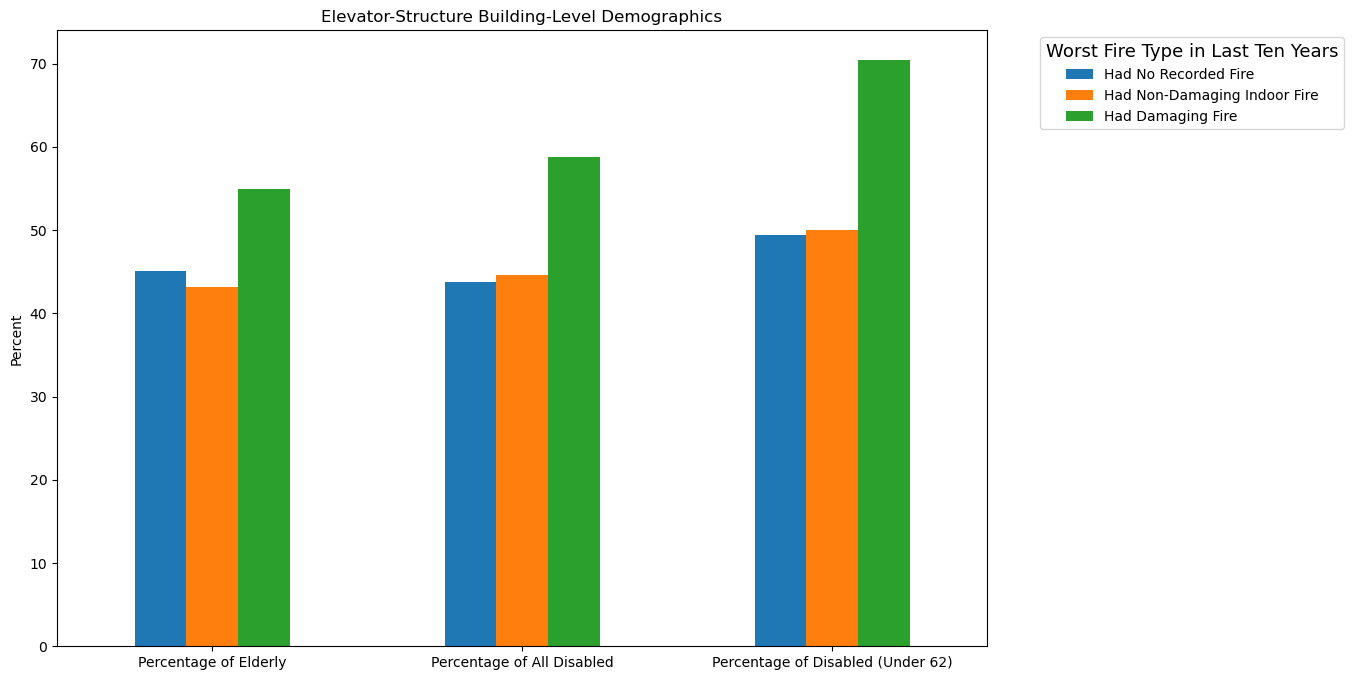

In [53]:
df = es.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'eldly_prcnt', 
    'pct_disabled_all',
    'pct_disabled_lt62',
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'eldly_prcnt': 'Percentage of Elderly',
    'pct_disabled_all': 'Percentage of All Disabled',
    'pct_disabled_lt62': 'Percentage of Disabled (Under 62)'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Elevator-Structure Building-Level Demographics')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

    'pct_10k_lt15k',
        'pct_bed1',

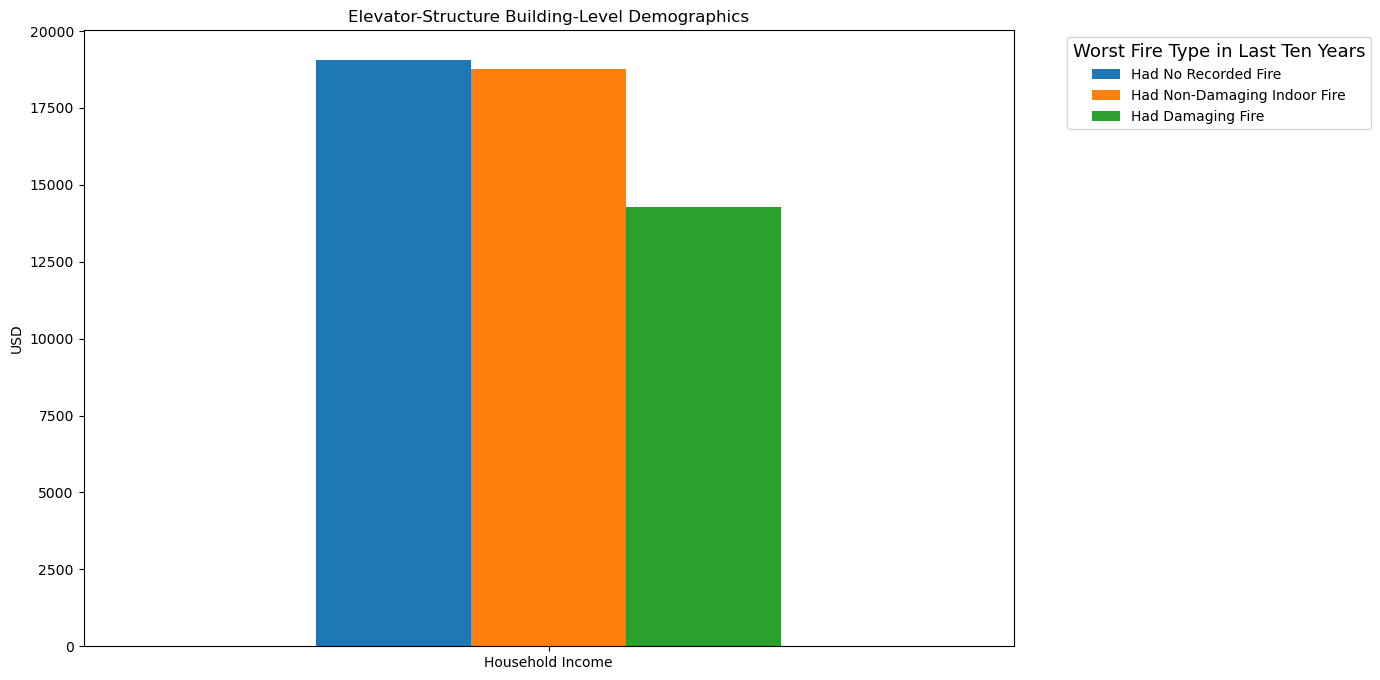

In [54]:
df = es.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'hh_income'
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'hh_income': 'Household Income'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Elevator-Structure Building-Level Demographics')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

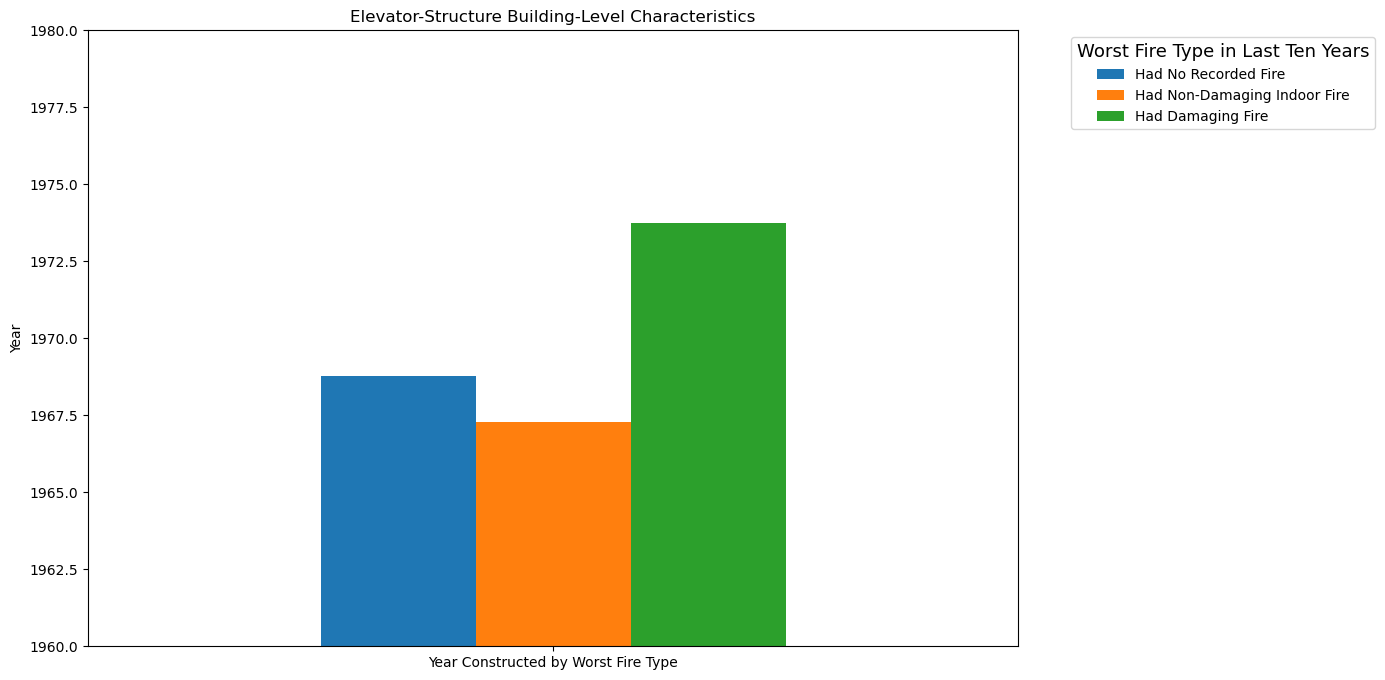

In [55]:
df = es.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'construction_year'
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'construction_year': 'Year Constructed by Worst Fire Type'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Elevator-Structure Building-Level Characteristics')
plt.ylabel('Year')
plt.ylim(1960, 1980)
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [56]:
nes.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'construction_year'
].mean().reset_index()


,yes_total_fires,yes_loss_fires,construction_year
0,False,False,1972.530204
1,True,False,1972.397059
2,True,True,1974.857524


In [57]:
nes.dev_eldly_prcnt.info()

<class 'pandas.core.series.Series'>
Int64Index: 175022 entries, 0 to 179042
Series name: dev_eldly_prcnt
Non-Null Count   Dtype  
--------------   -----  
171148 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


C:\Users\jackv\AppData\Local\Temp\ipykernel_18344\675305190.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = nes.groupby(['yes_total_fires', 'yes_loss_fires'])[


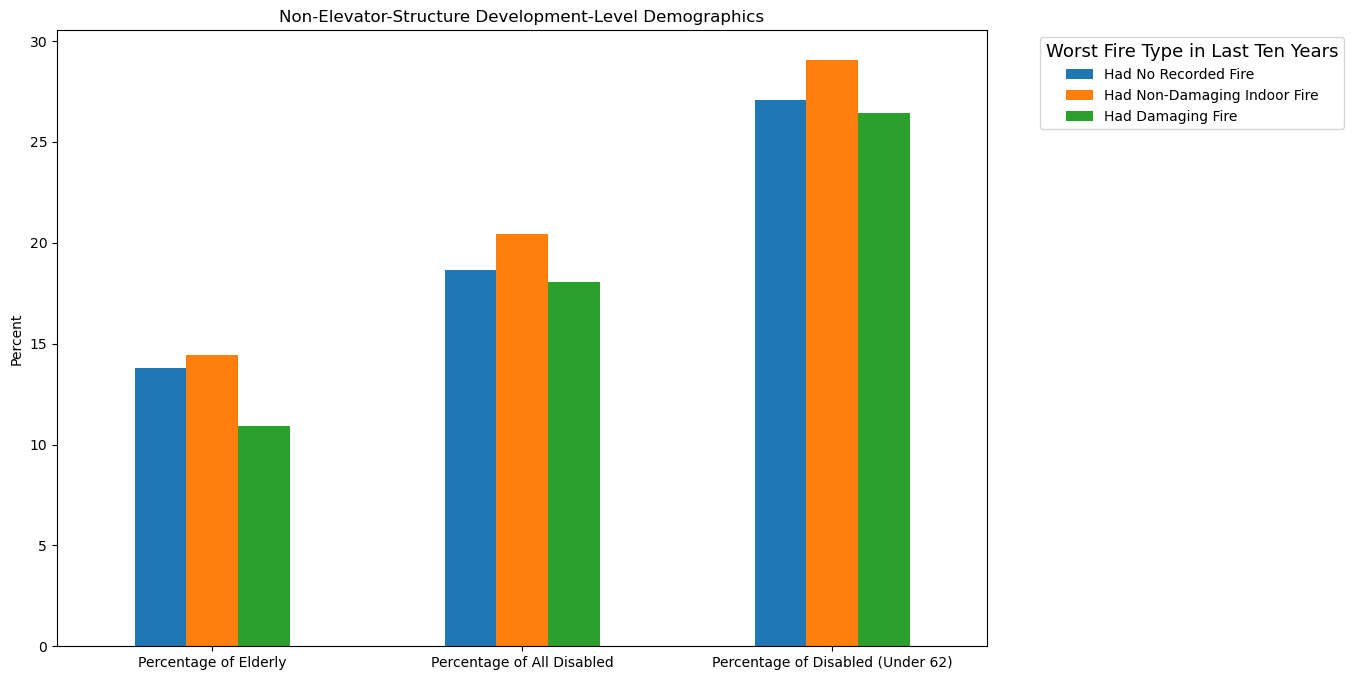

In [58]:
df = nes.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'dev_eldly_prcnt', 
    'dev_pct_disabled_all',
    'dev_pct_disabled_lt62',
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'dev_eldly_prcnt': 'Percentage of Elderly',
    'dev_pct_disabled_all': 'Percentage of All Disabled',
    'dev_pct_disabled_lt62': 'Percentage of Disabled (Under 62)'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Non-Elevator-Structure Development-Level Demographics')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

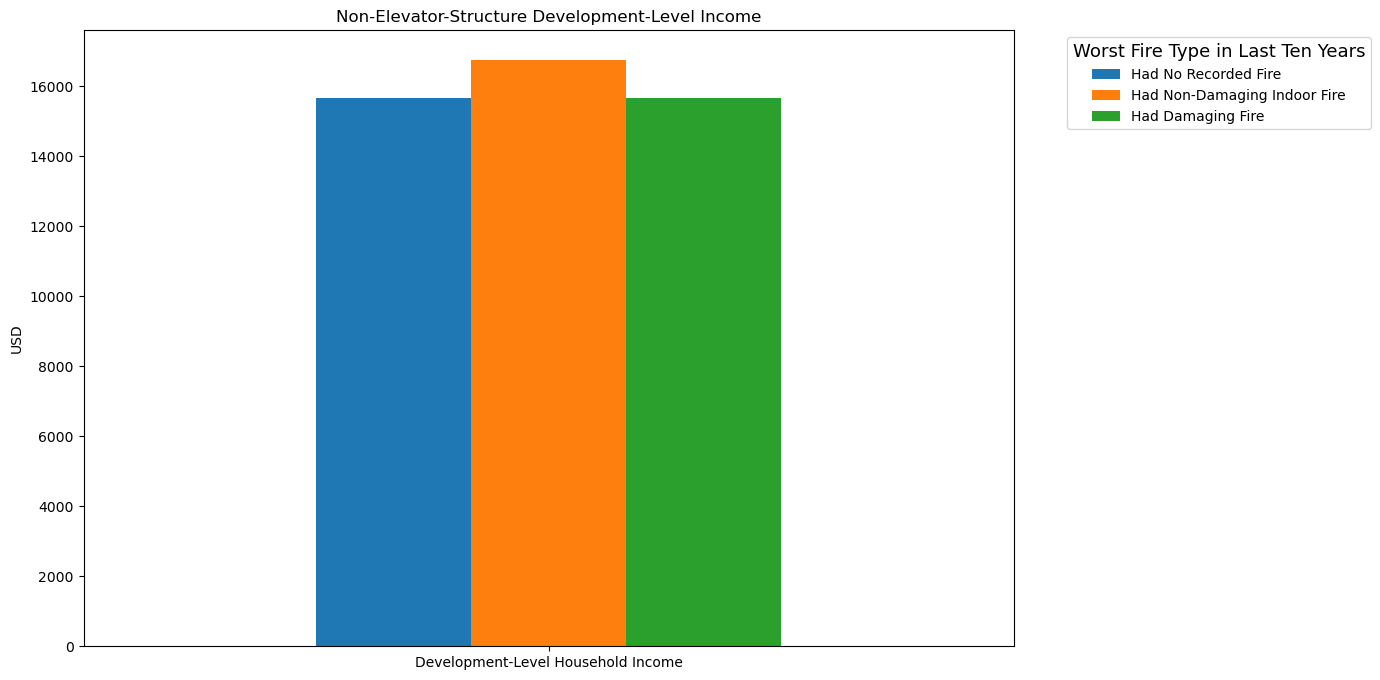

In [59]:
df = nes.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'dev_hh_income'
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'dev_hh_income': 'Development-Level Household Income'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Non-Elevator-Structure Development-Level Income')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

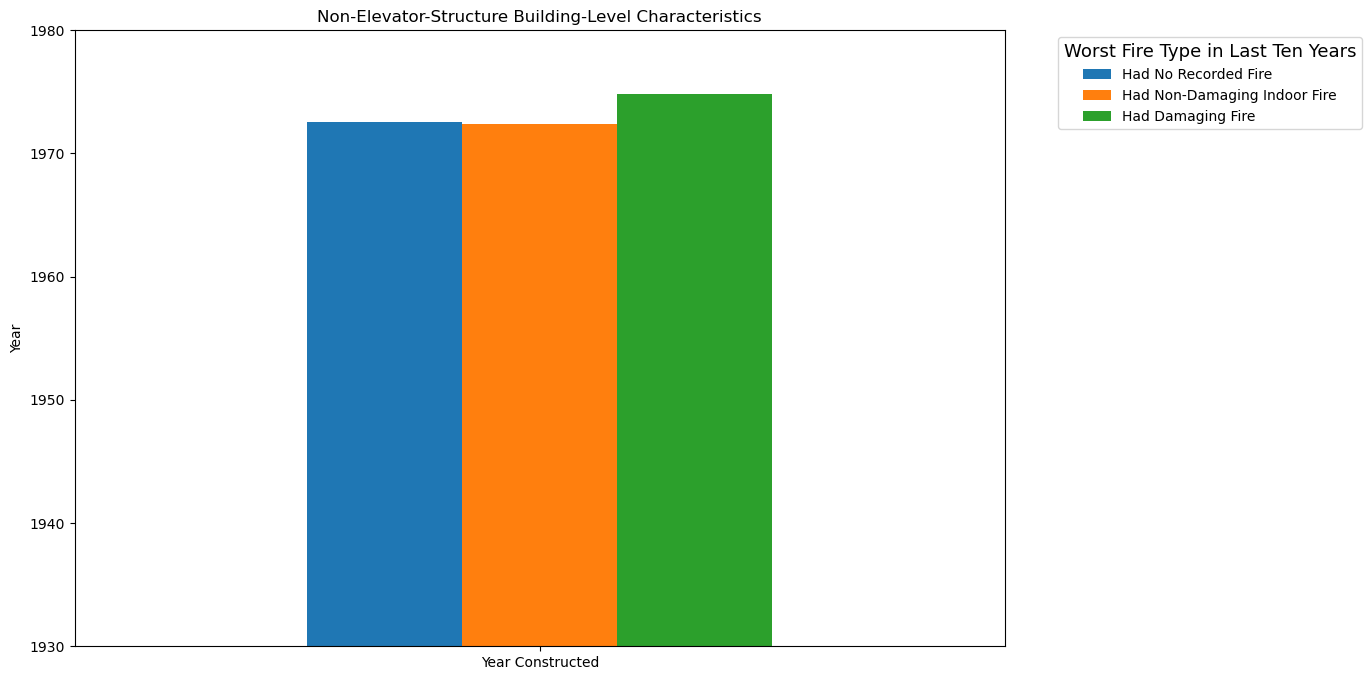

In [60]:
df = nes.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'construction_year'
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'construction_year': 'Year Constructed'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Non-Elevator-Structure Building-Level Characteristics')
plt.ylabel('Year')
plt.ylim(1930, 1980)
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

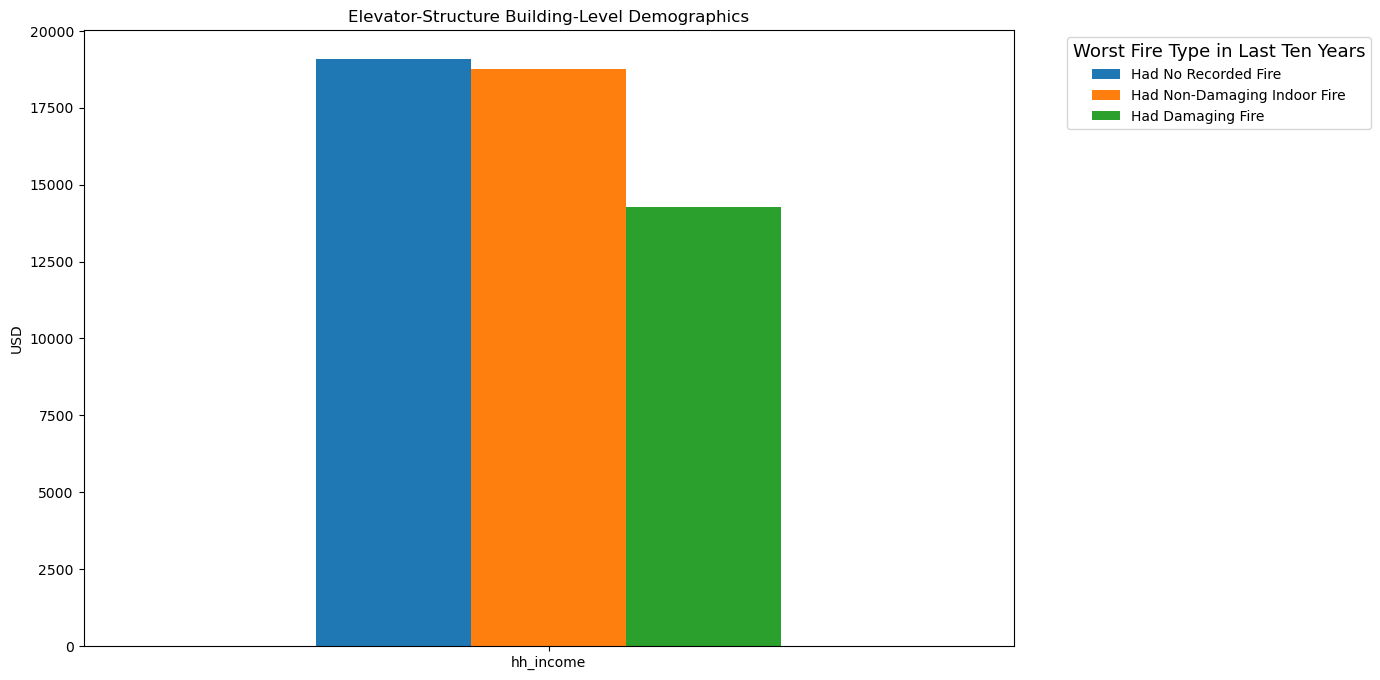

In [61]:
df = es.groupby(['yes_total_fires', 'yes_loss_fires'])[
    'hh_income'
].mean().reset_index()

# Function to rename the grouped categories
def rename_fire_categories(row):
    if not row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had No Recorded Fire'
    elif row['yes_total_fires'] and not row['yes_loss_fires']:
        return 'Had Non-Damaging Indoor Fire'
    else:
        return 'Had Damaging Fire'

df['fire_category'] = df.apply(rename_fire_categories, axis=1)

# Set index
df.set_index(['fire_category'], inplace=True)

# Drop original boolean columns since they're now redundant
df.drop(columns=['yes_total_fires', 'yes_loss_fires'], inplace=True)

# Transpose the DataFrame for plotting
df_T = df.T

# Renaming the indices for clarity on the chart
df_T = df_T.rename(index={
    'eldly_prcnt': 'Percentage of Elderly',
    'pct_disabled_all': 'Percentage of All Disabled',
    'pct_disabled_lt62': 'Percentage of Disabled (Under 62)'
})

# Plot the bar chart
df_T.plot(kind='bar', figsize=(12, 8))

plt.title('Elevator-Structure Building-Level Demographics')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.legend(title='Worst Fire Type in Last Ten Years', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

'rent_per_month',
    'pct_overhoused',
    'people_per_unit'